In [1]:
import pandas as pd
import requests
import numpy as np
import ast
import sqlite3 as sq3
from IPython.display import HTML
import matplotlib.pyplot as plt
pd.options.display.max_columns = 30

In [2]:
api_key  = "api_key=908e760c07977edc58a03ccb5820f10b"
movie_api = "https://api.themoviedb.org/3/movie/{}?"
movie_id = 140607

# IMPORT 
## Part 1 (Import Single Movie)

In [3]:
url = movie_api.format(movie_id) + api_key
url

'https://api.themoviedb.org/3/movie/140607?api_key=908e760c07977edc58a03ccb5820f10b'

In [4]:
r = requests.get(url)
r

<Response [200]>

In [5]:
data = r.json()
data

{'adult': False,
 'backdrop_path': '/k6EOrckWFuz7I4z4wiRwz8zsj4H.jpg',
 'belongs_to_collection': {'id': 10,
  'name': 'Star Wars Collection',
  'poster_path': '/r8Ph5MYXL04Qzu4QBbq2KjqwtkQ.jpg',
  'backdrop_path': '/d8duYyyC9J5T825Hg7grmaabfxQ.jpg'},
 'budget': 245000000,
 'genres': [{'id': 28, 'name': 'Action'},
  {'id': 12, 'name': 'Adventure'},
  {'id': 878, 'name': 'Science Fiction'},
  {'id': 14, 'name': 'Fantasy'}],
 'homepage': 'http://www.starwars.com/films/star-wars-episode-vii',
 'id': 140607,
 'imdb_id': 'tt2488496',
 'original_language': 'en',
 'original_title': 'Star Wars: The Force Awakens',
 'overview': 'Thirty years after defeating the Galactic Empire, Han Solo and his allies face a new threat from the evil Kylo Ren and his army of Stormtroopers.',
 'popularity': 31.232,
 'poster_path': '/wqnLdwVXoBjKibFRR5U3y0aDUhs.jpg',
 'production_companies': [{'id': 1634,
   'logo_path': None,
   'name': 'Truenorth Productions',
   'origin_country': 'IS'},
  {'id': 1,
   'logo_path

In [6]:
type(data)

dict

In [7]:
# pd.DataFrame(data)
pd.Series(data)

adult                                                                False
backdrop_path                             /k6EOrckWFuz7I4z4wiRwz8zsj4H.jpg
belongs_to_collection    {'id': 10, 'name': 'Star Wars Collection', 'po...
budget                                                           245000000
genres                   [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...
homepage                 http://www.starwars.com/films/star-wars-episod...
id                                                                  140607
imdb_id                                                          tt2488496
original_language                                                       en
original_title                                Star Wars: The Force Awakens
overview                 Thirty years after defeating the Galactic Empi...
popularity                                                          31.232
poster_path                               /wqnLdwVXoBjKibFRR5U3y0aDUhs.jpg
production_companies     

In [8]:
df = pd.Series(data).to_frame().T
df

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,/k6EOrckWFuz7I4z4wiRwz8zsj4H.jpg,"{'id': 10, 'name': 'Star Wars Collection', 'po...",245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.starwars.com/films/star-wars-episod...,140607,tt2488496,en,Star Wars: The Force Awakens,Thirty years after defeating the Galactic Empi...,31.232,/wqnLdwVXoBjKibFRR5U3y0aDUhs.jpg,"[{'id': 1634, 'logo_path': None, 'name': 'True...","[{'iso_3166_1': 'US', 'name': 'United States o...",2015-12-15,2068223624,136,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Every generation has a story.,Star Wars: The Force Awakens,False,7.4,14824


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   adult                  1 non-null      object
 1   backdrop_path          1 non-null      object
 2   belongs_to_collection  1 non-null      object
 3   budget                 1 non-null      object
 4   genres                 1 non-null      object
 5   homepage               1 non-null      object
 6   id                     1 non-null      object
 7   imdb_id                1 non-null      object
 8   original_language      1 non-null      object
 9   original_title         1 non-null      object
 10  overview               1 non-null      object
 11  popularity             1 non-null      object
 12  poster_path            1 non-null      object
 13  production_companies   1 non-null      object
 14  production_countries   1 non-null      object
 15  release_date           1 no

In [10]:
# pd.json_normalize(data, sep = "_")------> Masuk data cleaning

In [11]:
# pd.json_normalize(data = data, record_path = "genres", meta = "title")-------> masuk data Cleaning

In [12]:
# pd.json_normalize(data = data, record_path = "production_companies", meta = "title")-------> masuk data Cleaning

# IMPORT
## PART 2 : Import Lot Movies By Date Range

In [13]:
discover_api = "https://api.themoviedb.org/3/discover/movie?"
query = "&primary_release_date.gte=2000-01-01&primary_release_date.lte=2020-02-29"
# query = "&primary_release_date.gte=2020-01-01&primary_release_date.lte=2020-02-29&page=1"

In [14]:
url = discover_api+api_key+query
url

'https://api.themoviedb.org/3/discover/movie?api_key=908e760c07977edc58a03ccb5820f10b&primary_release_date.gte=2000-01-01&primary_release_date.lte=2020-02-29'

In [15]:
r = requests.get(url)
r

<Response [200]>

In [16]:
data = r.json()
data

{'page': 1,
 'total_results': 10000,
 'total_pages': 500,
 'results': [{'popularity': 90.046,
   'vote_count': 19382,
   'video': False,
   'poster_path': '/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg',
   'id': 299536,
   'adult': False,
   'backdrop_path': '/bOGkgRGdhrBYJSLpXaxhXVstddV.jpg',
   'original_language': 'en',
   'original_title': 'Avengers: Infinity War',
   'genre_ids': [28, 12, 878],
   'title': 'Avengers: Infinity War',
   'vote_average': 8.3,
   'overview': 'As the Avengers and their allies have continued to protect the world from threats too large for any one hero to handle, a new danger has emerged from the cosmic shadows: Thanos. A despot of intergalactic infamy, his goal is to collect all six Infinity Stones, artifacts of unimaginable power, and use them to inflict his twisted will on all of reality. Everything the Avengers have fought for has led up to this moment - the fate of Earth and existence itself has never been more uncertain.',
   'release_date': '2018-04-25'},
  {'

In [17]:
type(data)

dict

In [18]:
pd.DataFrame(data)
# pd.Series(data)

,page,total_results,total_pages,results
0,1,10000,500,"{'popularity': 90.046, 'vote_count': 19382, 'v..."
1,1,10000,500,"{'popularity': 125.037, 'vote_count': 4, 'vide..."
2,1,10000,500,"{'popularity': 89.547, 'vote_count': 14387, 'v..."
3,1,10000,500,"{'popularity': 84.996, 'vote_count': 16667, 'v..."
4,1,10000,500,"{'popularity': 82.177, 'vote_count': 26883, 'v..."
5,1,10000,500,"{'popularity': 67.062, 'vote_count': 8128, 'vi..."
6,1,10000,500,"{'popularity': 63.05, 'vote_count': 23421, 'vi..."
7,1,10000,500,"{'popularity': 84.637, 'vote_count': 5068, 'vi..."
8,1,10000,500,"{'popularity': 65.693, 'vote_count': 8862, 'vi..."
9,1,10000,500,"{'popularity': 72.976, 'vote_count': 5489, 'vi..."


In [19]:
df = pd.DataFrame(data["results"])
df

,popularity,vote_count,video,poster_path,id,adult,backdrop_path,original_language,original_title,genre_ids,title,vote_average,overview,release_date
0,90.046,19382,False,/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg,299536,False,/bOGkgRGdhrBYJSLpXaxhXVstddV.jpg,en,Avengers: Infinity War,"[28, 12, 878]",Avengers: Infinity War,8.3,As the Avengers and their allies have continue...,2018-04-25
1,125.037,4,False,/q85VR4nlUUu9tERLUvPFyq2WB8c.jpg,569715,False,/Yb4wrPE2XXfCtZeuj4eqRZzNZz.jpg,ko,맛있는 세자매,[10749],Delicious Three Sisters,4.5,The gentle gesture of the three sisters surrou...,2018-10-04
2,89.547,14387,False,/udDclJoHjfjb8Ekgsd4FDteOkCU.jpg,475557,False,/n6bUvigpRFqSwmPp1m2YADdbRBc.jpg,en,Joker,"[80, 18, 53]",Joker,8.2,"During the 1980s, a failed stand-up comedian i...",2019-10-02
3,84.996,16667,False,/rAGiXaUfPzY7CDEyNKUofk3Kw2e.jpg,271110,False,/7FWlcZq3r6525LWOcvO9kNWurN1.jpg,en,Captain America: Civil War,"[28, 12, 878]",Captain America: Civil War,7.4,"Following the events of Age of Ultron, the col...",2016-04-27
4,82.177,26883,False,/9gk7adHYeDvHkCSEqAvQNLV5Uge.jpg,27205,False,/s3TBrRGB1iav7gFOCNx3H31MoES.jpg,en,Inception,"[28, 12, 878]",Inception,8.3,"Cobb, a skilled thief who commits corporate es...",2010-07-15
5,67.062,8128,False,/4q2NNj4S5dG2RLF9CpXsej7yXl.jpg,429617,False,/5myQbDzw3l8K9yofUXRJ4UTVgam.jpg,en,Spider-Man: Far from Home,"[28, 12, 878]",Spider-Man: Far from Home,7.5,Peter Parker and his friends go on a summer tr...,2019-06-28
6,63.050,23421,False,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,157336,False,/xJHokMbljvjADYdit5fK5VQsXEG.jpg,en,Interstellar,"[12, 18, 878]",Interstellar,8.3,The adventures of a group of explorers who mak...,2014-11-05
7,84.637,5068,False,/azL2ThbJMIkts3ZMt3j1YgBUeDB.jpg,98566,False,/3eGlcdyxqEN57TtU8ypx52V4JMs.jpg,en,Teenage Mutant Ninja Turtles,"[28, 12, 35, 14, 878]",Teenage Mutant Ninja Turtles,5.9,The city needs heroes. Darkness has settled ov...,2014-08-07
8,65.693,8862,False,/7IiTTgloJzvGI1TAYymCfbfl3vT.jpg,496243,False,/ApiBzeaa95TNYliSbQ8pJv4Fje7.jpg,ko,기생충,"[35, 18, 53]",Parasite,8.5,"All unemployed, Ki-taek's family takes peculia...",2019-05-30
9,72.976,5489,False,/h4VB6m0RwcicVEZvzftYZyKXs6K.jpg,495764,False,/9xNOiv6DZZjH7ABoUUDP0ZynouU.jpg,en,Birds of Prey (and the Fantabulous Emancipatio...,"[28, 35, 80]",Birds of Prey (and the Fantabulous Emancipatio...,7.2,"Harley Quinn joins forces with a singer, an as...",2020-02-05


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   popularity         20 non-null     float64
 1   vote_count         20 non-null     int64  
 2   video              20 non-null     bool   
 3   poster_path        20 non-null     object 
 4   id                 20 non-null     int64  
 5   adult              20 non-null     bool   
 6   backdrop_path      20 non-null     object 
 7   original_language  20 non-null     object 
 8   original_title     20 non-null     object 
 9   genre_ids          20 non-null     object 
 10  title              20 non-null     object 
 11  vote_average       20 non-null     float64
 12  overview           20 non-null     object 
 13  release_date       20 non-null     object 
dtypes: bool(2), float64(2), int64(2), object(8)
memory usage: 2.0+ KB


# IMPORT
## PART 3 : Merge Part 1 and 2

In [21]:
# total_pages = data['total_pages']
# total_pages

In [22]:
# GET ALL MOVIE ID

# basic_query = "&primary_release_date.gte=1874-01-01&primary_release_date.lte=2020-02-29&page={}"
# movie_id_all = []
# for page in range(total_pages):
#     query = basic_query.format(page)
#     url = discover_api+api_key+query
#     r = requests.get(url)
#     data = r.json()
#     df = pd.DataFrame(data["results"])
#     movie_id = df['id'].to_list()
#     movie_id_all.append(movie_id)
# movie_id_all


In [23]:
movie_id = df['id'].to_list()
movie_id

[299536,
 569715,
 475557,
 271110,
 27205,
 429617,
 157336,
 98566,
 496243,
 495764,
 181812,
 419704,
 99861,
 671,
 420809,
 315635,
 530915,
 109445,
 87101,
 177572]

In [24]:
len(movie_id)

20

In [25]:
basic_url = 'https://api.themoviedb.org/3/movie/{}?{}' 

In [26]:
json_list = []
for movie in movie_id:
    url = basic_url.format(movie, api_key)
    r = requests.get(url)
    if r.status_code != 200:
        continue
    else:
        data = r.json()
        json_list.append(data) 
df = pd.DataFrame(json_list)

In [27]:
requests.get(basic_url.format(0, api_key)).status_code

404

In [28]:
df

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,/bOGkgRGdhrBYJSLpXaxhXVstddV.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",https://www.marvel.com/movies/avengers-infinit...,299536,tt4154756,en,Avengers: Infinity War,As the Avengers and their allies have continue...,89.842,/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg,"[{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...","[{'iso_3166_1': 'US', 'name': 'United States o...",2018-04-25,2046239637,149,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,An entire universe. Once and for all.,Avengers: Infinity War,False,8.3,19380
1,False,/Yb4wrPE2XXfCtZeuj4eqRZzNZz.jpg,None,0,"[{'id': 10749, 'name': 'Romance'}]",,569715,,ko,맛있는 세자매,The gentle gesture of the three sisters surrou...,89.312,/q85VR4nlUUu9tERLUvPFyq2WB8c.jpg,[],[],2018-10-04,0,81,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,,Delicious Three Sisters,False,4.5,4
2,False,/n6bUvigpRFqSwmPp1m2YADdbRBc.jpg,None,55000000,"[{'id': 80, 'name': 'Crime'}, {'id': 53, 'name...",http://www.jokermovie.net/,475557,tt7286456,en,Joker,"During the 1980s, a failed stand-up comedian i...",88.946,/udDclJoHjfjb8Ekgsd4FDteOkCU.jpg,"[{'id': 9993, 'logo_path': '/2Tc1P3Ac8M479naPp...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",2019-10-02,1074251311,122,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Put on a happy face.,Joker,False,8.2,14386
3,False,/7FWlcZq3r6525LWOcvO9kNWurN1.jpg,"{'id': 131295, 'name': 'Captain America Collec...",250000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://marvel.com/captainamericapremiere,271110,tt3498820,en,Captain America: Civil War,"Following the events of Age of Ultron, the col...",80.242,/rAGiXaUfPzY7CDEyNKUofk3Kw2e.jpg,"[{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...","[{'iso_3166_1': 'US', 'name': 'United States o...",2016-04-27,1153296293,147,"[{'iso_639_1': 'ro', 'name': 'Română'}, {'iso_...",Released,Divided We Fall,Captain America: Civil War,False,7.4,16666
4,False,/s3TBrRGB1iav7gFOCNx3H31MoES.jpg,None,160000000,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",http://inceptionmovie.warnerbros.com/,27205,tt1375666,en,Inception,"Cobb, a skilled thief who commits corporate es...",79.152,/9gk7adHYeDvHkCSEqAvQNLV5Uge.jpg,"[{'id': 923, 'logo_path': '/5UQsZrfbfG2dYJbx8D...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2010-07-15,825532764,148,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Your mind is the scene of the crime.,Inception,False,8.3,26882
5,False,/5myQbDzw3l8K9yofUXRJ4UTVgam.jpg,"{'id': 531241, 'name': 'Spider-Man (Avengers) ...",160000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",https://www.marvel.com/movies/spider-man-far-f...,429617,tt6320628,en,Spider-Man: Far from Home,Peter Parker and his friends go on a summer tr...,65.130,/4q2NNj4S5dG2RLF9CpXsej7yXl.jpg,"[{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...","[{'iso_3166_1': 'US', 'name': 'United States o...",2019-06-28,1131927996,129,"[{'iso_639_1': 'cs', 'name': 'Český'}, {'iso_6...",Released,It’s time to step up.,Spider-Man: Far from Home,False,7.5,8127
6,False,/xJHokMbljvjADYdit5fK5VQsXEG.jpg,None,165000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...",http://www.interstellarmovie.net/,157336,tt0816692,en,Interstellar,The adventures of a group of explorers who mak...,64.623,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,"[{'id': 923, 'logo_path': '/5UQsZrfbfG2dYJbx8D...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2014-11-05,675120017,169,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Mankind was born on Earth. It was never meant ...,Interstellar,False,8.3,23420
7,False,/3eGlcdyxqEN57TtU8ypx52V4JMs.jpg,"{'id': 401562, 'name': 'Teenage Mutant Ninja T...",125000000,"[{'

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  20 non-null     bool   
 1   backdrop_path          20 non-null     object 
 2   belongs_to_collection  11 non-null     object 
 3   budget                 20 non-null     int64  
 4   genres                 20 non-null     object 
 5   homepage               20 non-null     object 
 6   id                     20 non-null     int64  
 7   imdb_id                20 non-null     object 
 8   original_language      20 non-null     object 
 9   original_title         20 non-null     object 
 10  overview               20 non-null     object 
 11  popularity             20 non-null     float64
 12  poster_path            20 non-null     object 
 13  production_companies   20 non-null     object 
 14  production_countries   20 non-null     object 
 15  release_

In [30]:
df = pd.read_csv('.\CLEANING\movies_metadata.csv', low_memory=False)
df

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,/jldsYflnId4tTWPx8es3uzsB1I8.jpg,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,/xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,/d5bX92nDsISNhu3ZT69uHwmfCGw.jpg,"[{'name': 'American World Pictures', 'id': 6165}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45

# CLEANING
## Part 1 : Dropping Irrelevant Columns
1. imdb_id
2. original_title
3. video
4. homepage


In [31]:
df.drop(columns = ['imdb_id','original_title','video','homepage'], inplace = True)

# CLEANING
## Part 2 : Handle Sringified JSON Columns

In [32]:
df.belongs_to_collection = df.belongs_to_collection.apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else np.nan)

In [33]:
df.genres = df.genres.apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else np.nan)

In [34]:
df.spoken_languages = df.spoken_languages.apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else np.nan)

In [35]:
df.production_countries = df.production_countries.apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else np.nan)

In [36]:
df.production_companies = df.production_companies.apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else np.nan)

# CLEANING
## Part 3 : Flatten Nested Columns 
1. belongs_to_collection
2. genres
3. spoken_language
5. production_companies
6. production_countries

1. belongs_to_collection

In [37]:
df.belongs_to_collection = df.belongs_to_collection.apply(lambda x: x['name'] if isinstance(x,dict) else np.nan)
df.belongs_to_collection

0                  Toy Story Collection
1                                   NaN
2             Grumpy Old Men Collection
3                                   NaN
4        Father of the Bride Collection
                      ...              
45461                               NaN
45462                               NaN
45463                               NaN
45464                               NaN
45465                               NaN
Name: belongs_to_collection, Length: 45466, dtype: object

2. genres

In [38]:
df.genres = df.genres.apply(lambda x: "|".join(i['name'] for i in x))
df.genres

0         Animation|Comedy|Family
1        Adventure|Fantasy|Family
2                  Romance|Comedy
3            Comedy|Drama|Romance
4                          Comedy
                   ...           
45461                Drama|Family
45462                       Drama
45463       Action|Drama|Thriller
45464                            
45465                            
Name: genres, Length: 45466, dtype: object

In [39]:
df.genres[df.genres == ""]

55        
83        
126       
137       
390       
        ..
45447     
45448     
45455     
45464     
45465     
Name: genres, Length: 2442, dtype: object

In [40]:
df.genres.replace("", np.nan, inplace = True)

3. spoken_language

In [41]:
df.spoken_languages = df.spoken_languages.apply(lambda x: "|".join(i['name'] for i in x)if isinstance(x,list)else np.nan)
df.spoken_languages

0                 English
1        English|Français
2                 English
3                 English
4                 English
               ...       
45461               فارسی
45462                    
45463             English
45464                    
45465             English
Name: spoken_languages, Length: 45466, dtype: object

In [42]:
df.spoken_languages[df.spoken_languages == ""]

50        
83        
107       
126       
137       
        ..
45446     
45447     
45448     
45462     
45464     
Name: spoken_languages, Length: 3952, dtype: object

In [43]:
df.spoken_languages.replace("", np.nan, inplace = True)

4. production_companies

In [44]:
df.production_companies = df.production_companies.apply(lambda x: "|".join(i['name'] for i in x)if isinstance(x,list)else np.nan)
df.production_companies

0                                  Pixar Animation Studios
1        TriStar Pictures|Teitler Film|Interscope Commu...
2                              Warner Bros.|Lancaster Gate
3                   Twentieth Century Fox Film Corporation
4                Sandollar Productions|Touchstone Pictures
                               ...                        
45461                                                     
45462                                          Sine Olivia
45463                              American World Pictures
45464                                            Yermoliev
45465                                                     
Name: production_companies, Length: 45466, dtype: object

In [45]:
df.production_companies[df.production_companies == ""]

50        
52        
57        
58        
83        
        ..
45452     
45455     
45457     
45461     
45465     
Name: production_companies, Length: 11875, dtype: object

In [46]:
df.production_companies.replace("", np.nan, inplace = True)

In [47]:
df.production_companies.sort_values()

43935    'A' Production Committee
44582                    (주)로드픽쳐스
33835                   (주)로제타시네마
44374                (주)비에이엔터테인먼트
1476              .406 Production
                   ...           
45452                         NaN
45455                         NaN
45457                         NaN
45461                         NaN
45465                         NaN
Name: production_companies, Length: 45466, dtype: object

6. production_countries

In [48]:
df.production_countries= df.production_countries.apply(lambda x: "|".join(i['name'] for i in x)if isinstance(x,list)else np.nan)
df.production_countries

0        United States of America
1        United States of America
2        United States of America
3        United States of America
4        United States of America
                   ...           
45461                        Iran
45462                 Philippines
45463    United States of America
45464                      Russia
45465              United Kingdom
Name: production_countries, Length: 45466, dtype: object

In [49]:
df.production_countries[df.production_countries == ""]

50        
55        
83        
106       
107       
        ..
45432     
45434     
45438     
45455     
45457     
Name: production_countries, Length: 6282, dtype: object

In [50]:
df.production_countries.replace("", np.nan, inplace = True)

# CLEANING
## Part 4 : Convert Data Type And Numerical Columns Inspection
1. budget -- float
2. id -- float
3. popularity -- float
4. vote_count -- np.nan
5. release_date -- datetime
6. runtime -- np.nan

##### 1. budget columns

In [51]:
df.info() #budget, id, popularity harusnya float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4491 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 43024 non-null  object 
 4   id                     45466 non-null  object 
 5   original_language      45455 non-null  object 
 6   overview               44512 non-null  object 
 7   popularity             45461 non-null  object 
 8   poster_path            45080 non-null  object 
 9   production_companies   33585 non-null  object 
 10  production_countries   39178 non-null  object 
 11  release_date           45379 non-null  object 
 12  revenue                45460 non-null  float64
 13  runtime                45203 non-null  float64
 14  spoken_languages       41508 non-null  object 
 15  st

In [52]:
df['budget'] = pd.to_numeric(df['budget'], errors = "coerce")
df['budget'].value_counts() #tidak mungkin budget 0, maka ganti saja dengan Nan

0.0           36573
5000000.0       286
10000000.0      259
20000000.0      243
2000000.0       242
              ...  
4490331.0         1
313411.0          1
1020000.0         1
37.0              1
9500.0            1
Name: budget, Length: 1223, dtype: int64

In [53]:
df['budget'] = df['budget'].replace(0, np.nan)
df['budget'].value_counts(dropna = False)

NaN           36576
5000000.0       286
10000000.0      259
20000000.0      243
2000000.0       242
              ...  
4490331.0         1
313411.0          1
1020000.0         1
37.0              1
9500.0            1
Name: budget, Length: 1223, dtype: int64

##### 2. id column

In [54]:
df['id'] = pd.to_numeric(df['id'], errors = "coerce")
df['id'].value_counts(dropna = False)

141971.0    3
NaN         3
12600.0     2
18440.0     2
42495.0     2
           ..
41244.0     1
10518.0     1
55971.0     1
91070.0     1
1408.0      1
Name: id, Length: 45434, dtype: int64

##### 3. popularity column

In [55]:
df['popularity'] = pd.to_numeric(df['popularity'], errors = "coerce")
df['popularity'].value_counts(dropna = False)

0.000000     66
0.000001     56
0.000308     43
0.000220     40
0.000578     38
             ..
10.066776     1
0.954314      1
1.874027      1
0.512893      1
5.603312      1
Name: popularity, Length: 43758, dtype: int64

##### 4. vote_count column

In [56]:
df['vote_count'].value_counts(dropna = False).sort_index() # count 0, maka kita replace dengan Nan

0.0        2899
1.0        3264
2.0        3132
3.0        2787
4.0        2480
           ... 
12000.0       1
12114.0       1
12269.0       1
14075.0       1
NaN           6
Name: vote_count, Length: 1821, dtype: int64

In [57]:
df['vote_count'] = df['vote_count'].replace(0, np.nan)
df['vote_count'].value_counts(dropna = False).sort_index() 

1.0        3264
2.0        3132
3.0        2787
4.0        2480
5.0        2097
           ... 
12000.0       1
12114.0       1
12269.0       1
14075.0       1
NaN        2905
Name: vote_count, Length: 1820, dtype: int64

##### 5. released_date column

In [58]:
df['release_date'] = pd.to_datetime(df['release_date'], errors = "coerce")

##### 6. runtime column

In [59]:
df.runtime.value_counts(dropna = False).sort_index()

0.0       1558
1.0        107
2.0         33
3.0         48
4.0         51
          ... 
925.0        1
931.0        1
1140.0       2
1256.0       1
NaN        263
Name: runtime, Length: 354, dtype: int64

In [60]:
df['vote_count'] = df['vote_count'].replace(0, np.nan)
df['vote_count'].value_counts(dropna = False).sort_index() 

1.0        3264
2.0        3132
3.0        2787
4.0        2480
5.0        2097
           ... 
12000.0       1
12114.0       1
12269.0       1
14075.0       1
NaN        2905
Name: vote_count, Length: 1820, dtype: int64

# CLEANING
## Part 5 : String Columns Inspection

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   adult                  45466 non-null  object        
 1   belongs_to_collection  4491 non-null   object        
 2   budget                 8890 non-null   float64       
 3   genres                 43024 non-null  object        
 4   id                     45463 non-null  float64       
 5   original_language      45455 non-null  object        
 6   overview               44512 non-null  object        
 7   popularity             45460 non-null  float64       
 8   poster_path            45080 non-null  object        
 9   production_companies   33585 non-null  object        
 10  production_countries   39178 non-null  object        
 11  release_date           45376 non-null  datetime64[ns]
 12  revenue                45460 non-null  float64       
 13  r

##### 1. adult column

In [62]:
df['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
 - Written by Ørnås                                                                                                                   1
Name: adult, dtype: int64

In [63]:
df.loc[df['adult'] == " - Written by Ørnås"]

,adult,belongs_to_collection,budget,genres,id,original_language,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
19730,- Written by Ørnås,NaN,NaN,Carousel Productions|Vision View Entertainment...,NaN,104.0,Released,NaN,Midnight Man,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
df.loc[df['adult'] == " Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all."]

,adult,belongs_to_collection,budget,genres,id,original_language,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
29503,Rune Balot goes to a casino connected to the ...,NaN,NaN,Aniplex|GoHands|BROSTA TV|Mardock Scramble Pro...,NaN,68.0,Released,NaN,Mardock Scramble: The Third Exhaust,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
df.loc[df['adult'] == " Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche."]

,adult,belongs_to_collection,budget,genres,id,original_language,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
35587,Avalanche Sharks tells the story of a bikini ...,NaN,NaN,Odyssey Media|Pulser Productions|Rogue State|T...,NaN,82.0,Released,NaN,Avalanche Sharks,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
df.drop([19730,29503,35587], inplace = True)

##### 2. overview column

In [67]:
df['overview'].value_counts()

No overview found.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                133
No Overview                                                                                                                                                                                                                                                                                                                                                                                                                       

In [68]:
df['overview'].replace('No overview found.', np.nan, inplace = True)
df['overview'].replace('No Overview', np.nan, inplace = True)
df['overview'].replace('No movie overview available.', np.nan, inplace = True)
df['overview'].replace(' ', np.nan, inplace = True)

In [69]:
df['overview'].value_counts(dropna =False)

NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   1102
A few funny little novels about different aspects of life.                                                                                                                                                                                                                                                                   

##### 3. tagline tagline

In [70]:
df['tagline'].value_counts() # terlihat arakter -

Based on a true story.                                               7
-                                                                    4
Be careful what you wish for.                                        4
Trust no one.                                                        4
The end is near.                                                     3
                                                                    ..
This film is not based on a real story. It is based on thousands.    1
No man should die alone                                              1
Ladies' Man - And Lady Killer!                                       1
Hell Is For Heroes                                                   1
The celebrated story of a man obsessed by ideal beauty               1
Name: tagline, Length: 20283, dtype: int64

In [71]:
df['tagline'] = df['tagline'].replace('-', np.nan) 
df['tagline'].value_counts()

Based on a true story.                                    7
Be careful what you wish for.                             4
Trust no one.                                             4
Classic Albums                                            3
There is no turning back                                  3
                                                         ..
No man should die alone                                   1
Ladies' Man - And Lady Killer!                            1
Hell Is For Heroes                                        1
Tokyo Is Burning                                          1
The celebrated story of a man obsessed by ideal beauty    1
Name: tagline, Length: 20282, dtype: int64

##### 4. poster_path column

In [72]:
df.poster_path[0]

'/rhIRbceoE9lR4veEXuwCC2wARtG.jpg'

In [73]:
base_poster_url = 'http://image.tmdb.org/t/p/w185/'
df.poster_path = "<img src='" + base_poster_url + df.poster_path + "'style='height:100px;'>"

# CLEANING
## Part 6 : Detect And Remove Duplicate

In [74]:
df[df.duplicated(keep = False)].sort_values(by= 'id')

,adult,belongs_to_collection,budget,genres,id,original_language,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
7345,False,NaN,NaN,Crime|Drama|Thriller,5511.0,fr,Hitman Jef Costello is a perfectionist who alw...,9.091288,<img src='http://image.tmdb.org/t/p/w185//cvNW...,Fida cinematografica|Compagnie Industrielle et...,France|Italy,1967-10-25,39481.0,105.0,Français,Released,There is no solitude greater than that of the ...,Le Samouraï,7.9,187.0
9165,False,NaN,NaN,Crime|Drama|Thriller,5511.0,fr,Hitman Jef Costello is a perfectionist who alw...,9.091288,<img src='http://image.tmdb.org/t/p/w185//cvNW...,Fida cinematografica|Compagnie Industrielle et...,France|Italy,1967-10-25,39481.0,105.0,Français,Released,There is no solitude greater than that of the ...,Le Samouraï,7.9,187.0
24844,False,NaN,NaN,Comedy|Drama,11115.0,en,As an ex-gambler teaches a hot-shot college ki...,6.880365,<img src='http://image.tmdb.org/t/p/w185//kHaB...,Andertainment Group|Crescent City Pictures|Tag...,United States of America,2008-01-29,0.0,85.0,English,Released,NaN,Deal,5.2,22.0
14012,False,NaN,NaN,Comedy|Drama,11115.0,en,As an ex-gambler teaches a hot-shot college ki...,6.880365,<img src='http://image.tmdb.org/t/p/w185//kHaB...,Andertainment Group|Crescent City Pictures|Tag...,United States of America,2008-01-29,0.0,85.0,English,Released,NaN,Deal,5.2,22.0
22151,False,NaN,NaN,Action|Horror|Science Fiction,18440.0,en,When a comet strikes Earth and kicks up a clou...,1.436085,<img src='http://image.tmdb.org/t/p/w185//tWCy...,NaN,United States of America,2007-01-01,0.0,89.0,English,Released,NaN,Days of Darkness,5.0,5.0
14000,False,NaN,NaN,Action|Horror|Science Fiction,18440.0,en,When a comet strikes Earth and kicks up a clou...,1.436085,<img src='http://image.tmdb.org/t/p/w185//tWCy...,NaN,United States of America,2007-01-01,0.0,89.0,English,Released,NaN,Days of Darkness,5.0,5.0
8068,False,NaN,NaN,Adventure|Animation|Drama|Action|Foreign,23305.0,en,"In feudal India, a warrior (Khan) who renounce...",1.967992,<img src='http://image.tmdb.org/t/p/w185//9Glr...,Filmfour,France|Germany|India|United Kingdom,2001-09-23,0.0,86.0,हिन्दी,Released,NaN,The Warrior,6.3,15.0
9327,False,NaN,NaN,Adventure|Animation|Drama|Action|Foreign,23305.0,en,"In feudal India, a warrior (Khan) who renounce...",1.967992,<img src='http://image.tmdb.org/t/p/w185//9Glr...,Filmfour,France|Germany|India|United Kingdom,2001-09-23,0.0,86.0,हिन्दी,Released,NaN,The Warrior,6.3,15.0
17229,False,NaN,NaN,Drama,25541.0,da,Former Danish servicemen Lars and Jimmy are th...,2.587911,<img src='http://image.tmdb.org/t/p/w185//q19Q...,NaN,Sweden|Denmark,2009-10-21,0.0,90.0,Dansk,Released,NaN,Brotherhood,7.1,21.0
23044,False,NaN,NaN,Drama,25541.0,da,Former Danish servicemen Lars and Jimmy are th...,2.587911,<img src='http://image.tmdb.org/t/p/w185//q19Q...,NaN,Sweden|Denmark,2009-10-21,0.0,90.0,Dansk,Released,NaN,Brotherhood,7.1,21.0


In [75]:
df.drop_duplicates(inplace = True)

In [76]:
df[df.duplicated(subset = 'id', keep = False)].sort_values(by= 'id')

,adult,belongs_to_collection,budget,genres,id,original_language,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
33826,False,NaN,30000000.0,Comedy|Crime|Drama|Romance|Thriller,4912.0,en,"Television made him famous, but his biggest hi...",7.645827,<img src='http://image.tmdb.org/t/p/w185//o3Im...,Miramax Films|Allied Filmmakers|Mad Chance,United States of America,2002-12-30,33013805.0,113.0,English,Released,Some things are better left top secret.,Confessions of a Dangerous Mind,6.6,281.0
5865,False,NaN,30000000.0,Comedy|Crime|Drama|Romance|Thriller,4912.0,en,"Television made him famous, but his biggest hi...",11.331072,<img src='http://image.tmdb.org/t/p/w185//o3Im...,Miramax Films|Allied Filmmakers|Mad Chance,United States of America,2002-12-30,33013805.0,113.0,English,Released,Some things are better left top secret.,Confessions of a Dangerous Mind,6.6,281.0
4114,False,Pokémon Collection,16000000.0,Adventure|Fantasy|Animation|Action|Family,10991.0,ja,When Molly Hale's sadness of her father's disa...,10.264597,<img src='http://image.tmdb.org/t/p/w185//5ILj...,TV Tokyo|4 Kids Entertainment|Nintendo|Pikachu...,Japan,2000-07-08,68411275.0,93.0,English,Released,Pokémon: Spell of the Unknown,Pokémon: Spell of the Unknown,6.0,143.0
44821,False,Pokémon Collection,16000000.0,Adventure|Fantasy|Animation|Action|Family,10991.0,ja,When Molly Hale's sadness of her father's disa...,6.480376,<img src='http://image.tmdb.org/t/p/w185//5ILj...,TV Tokyo|4 Kids Entertainment|Nintendo|Pikachu...,Japan,2000-07-08,68411275.0,93.0,English,Released,Pokémon: Spell of the Unknown,Pokémon: Spell of the Unknown,6.0,144.0
44826,False,Pokémon Collection,NaN,Adventure|Fantasy|Animation|Science Fiction|Fa...,12600.0,ja,"All your favorite Pokémon characters are back,...",6.080108,<img src='http://image.tmdb.org/t/p/w185//bqL0...,NaN,Japan|United States of America,2001-07-06,28023563.0,75.0,日本語,Released,NaN,Pokémon 4Ever: Celebi - Voice of the Forest,5.7,82.0
5535,False,Pokémon Collection,NaN,Adventure|Fantasy|Animation|Science Fiction|Fa...,12600.0,ja,"All your favorite Pokémon characters are back,...",7.072301,<img src='http://image.tmdb.org/t/p/w185//bqL0...,NaN,Japan|United States of America,2001-07-06,28023563.0,75.0,日本語,Released,NaN,Pokémon 4Ever: Celebi - Voice of the Forest,5.7,82.0
15765,False,NaN,2500.0,Drama|Comedy|Foreign,13209.0,fa,"Since women are banned from soccer matches, Ir...",1.529879,<img src='http://image.tmdb.org/t/p/w185//nfkO...,Jafar Panahi Film Productions,Iran,2006-05-26,0.0,93.0,فارسی,Released,NaN,Offside,6.7,27.0
11342,False,NaN,2500.0,Drama|Comedy|Foreign,13209.0,fa,"Since women are banned from soccer matches, Ir...",1.528960,<img src='http://image.tmdb.org/t/p/w185//nfkO...,Jafar Panahi Film Productions,Iran,2006-05-26,0.0,93.0,فارسی,Released,NaN,Offside,6.7,27.0
10419,False,NaN,1600000.0,Drama|Crime|Mystery,14788.0,en,Set against the backdrop of a decaying Midwest...,3.185256,<img src='http://image.tmdb.org/t/p/w185//w56o...,Magnolia Pictures|Extension 765,United States of America,2005-09-03,0.0,73.0,English,Released,NaN,Bubble,6.4,36.0
12066,False,NaN,1600000.0,Drama|Crime|Mystery,14788.0,en,Set against the backdrop of a decaying Midwest...,3.008299,<img src='http://image.tmdb.org/t/p/w185//w56o...,Magnolia Pictures|Extension 765,United States of America,2005-09-03,0.0,73.0,English,Released,NaN,Bubble,6.4,36.0


In [77]:
df.drop_duplicates(subset = 'id', inplace = True)

# CLEANING
## Part 7 : Handling Missing Value

In [78]:
df.isna().sum()

adult                        0
belongs_to_collection    40945
budget                   36553
genres                    2442
id                           0
original_language           11
overview                  1102
popularity                   3
poster_path                386
production_companies     11871
production_countries      6282
release_date                87
revenue                      3
runtime                    260
spoken_languages          3953
status                      84
tagline                  25036
title                        3
vote_average                 3
vote_count                2899
dtype: int64

In [79]:
df[df.title.isna()]

,adult,belongs_to_collection,budget,genres,id,original_language,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
19729,False,NaN,NaN,Action|Thriller|Drama,82663.0,en,British soldiers force a recently captured IRA...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29502,False,Mardock Scramble Collection,NaN,Animation|Science Fiction,122662.0,ja,Third film of the Mardock Scramble series.,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35586,False,NaN,NaN,TV Movie|Action|Horror|Science Fiction,249260.0,en,A group of skiers are terrorized during spring...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
df.dropna(subset = ['title'], inplace = True)

In [81]:
df.isna().sum()

adult                        0
belongs_to_collection    40943
budget                   36550
genres                    2442
id                           0
original_language           11
overview                  1102
popularity                   0
poster_path                383
production_companies     11868
production_countries      6279
release_date                84
revenue                      0
runtime                    257
spoken_languages          3950
status                      81
tagline                  25033
title                        0
vote_average                 0
vote_count                2896
dtype: int64

In [82]:
df.notna().sum(axis = 1).value_counts().sort_values(ascending = False)

17    13127
18    12634
19     6157
16     5634
15     3048
14     1885
20     1359
13      986
12      384
11      164
10       38
9        11
8         3
dtype: int64

In [83]:
df[df.notna().sum(axis = 1) == 9]

,adult,belongs_to_collection,budget,genres,id,original_language,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
2140,False,NaN,NaN,NaN,77314.0,fr,NaN,0.037500,<img src='http://image.tmdb.org/t/p/w185//8prm...,NaN,NaN,1991-12-04,0.0,NaN,NaN,NaN,NaN,The Cabinet of Dr. Ramirez,0.0,NaN
14890,False,NaN,NaN,NaN,174748.0,no,NaN,0.000000,NaN,NaN,NaN,1984-12-30,0.0,NaN,NaN,Released,NaN,Lars i porten,0.0,NaN
18572,False,NaN,NaN,Documentary,404471.0,fi,NaN,0.000000,NaN,NaN,NaN,NaT,0.0,NaN,NaN,Released,NaN,Pölynimurikauppiaat,0.0,NaN
29309,False,NaN,NaN,NaN,335141.0,fr,NaN,0.001648,NaN,NaN,NaN,1998-01-01,0.0,NaN,NaN,Released,NaN,Bob le magnifique,0.0,NaN
35652,False,NaN,NaN,NaN,374698.0,nl,NaN,0.001290,NaN,NaN,NaN,2001-10-24,0.0,NaN,NaN,Released,NaN,Vallen,0.0,NaN
36421,False,NaN,NaN,NaN,382436.0,ru,NaN,0.073358,NaN,NaN,NaN,NaT,0.0,NaN,NaN,Released,NaN,"Vous êtes très jolie, mademoiselle",5.0,2.0
37640,False,NaN,NaN,NaN,54566.0,fi,NaN,0.001189,<img src='http://image.tmdb.org/t/p/w185//clWW...,NaN,NaN,1966-08-26,0.0,NaN,NaN,NaN,NaN,Millipilleri,0.0,NaN
40203,False,NaN,NaN,NaN,410576.0,en,NaN,0.000253,<img src='http://image.tmdb.org/t/p/w185//oUgQ...,NaN,NaN,NaT,0.0,NaN,NaN,Released,NaN,Bad Dad Rehab,0.0,NaN
41399,False,NaN,NaN,NaN,419289.0,es,NaN,0.000000,<img src='http://image.tmdb.org/t/p/w185//4qVp...,NaN,NaN,NaT,0.0,NaN,NaN,Released,NaN,Allende en su laberinto,0.0,NaN
42573,False,NaN,NaN,NaN,440361.0,de,NaN,0.070588,NaN,NaN,NaN,NaT,0.0,NaN,NaN,Released,NaN,Whn the day had no name,7.0,2.0


In [84]:
df.dropna(thresh = 10, inplace = True)

In [85]:
df.notna().sum(axis = 1).value_counts().sort_values(ascending = False)

17    13127
18    12634
19     6157
16     5634
15     3048
14     1885
20     1359
13      986
12      384
11      164
10       38
dtype: int64

# MERGING AND TRANSFORMING
## Part 1 : Transfroming Dataset 1

In [86]:
df.id = df.id.astype("int64")

In [87]:
df.status.value_counts()

Released           44973
Rumored              229
Post Production       98
In Production         20
Planned               15
Canceled               2
Name: status, dtype: int64

In [88]:
df = df.loc[df.status == "Released"].copy()

In [89]:
col = ["id", "title", "tagline", "release_date", "genres", "belongs_to_collection", 
       "original_language", "budget", "revenue", "production_companies",
       "production_countries", "vote_count", "vote_average", "popularity", "runtime",
       "overview", "spoken_languages","adult", "poster_path"]

In [90]:
df = df.loc[:, col]

In [91]:
df.reset_index(drop = True, inplace =True)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44973 entries, 0 to 44972
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     44973 non-null  int64         
 1   title                  44973 non-null  object        
 2   tagline                20285 non-null  object        
 3   release_date           44904 non-null  datetime64[ns]
 4   genres                 42600 non-null  object        
 5   belongs_to_collection  4463 non-null   object        
 6   original_language      44963 non-null  object        
 7   budget                 8855 non-null   float64       
 8   revenue                44973 non-null  float64       
 9   production_companies   33357 non-null  object        
 10  production_countries   38839 non-null  object        
 11  vote_count             42143 non-null  float64       
 12  vote_average           44973 non-null  float64       
 13  p

# MERGING AND TRANSFORMING
## Part 1 : Dataset 2

In [93]:
df = pd.read_csv("movies_clean.csv")

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44691 entries, 0 to 44690
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     44691 non-null  int64  
 1   title                  44691 non-null  object 
 2   tagline                20284 non-null  object 
 3   release_date           44657 non-null  object 
 4   genres                 42586 non-null  object 
 5   belongs_to_collection  4463 non-null   object 
 6   original_language      44681 non-null  object 
 7   budget_musd            8854 non-null   float64
 8   revenue_musd           7385 non-null   float64
 9   production_companies   33356 non-null  object 
 10  production_countries   38835 non-null  object 
 11  vote_count             44691 non-null  float64
 12  vote_average           42077 non-null  float64
 13  popularity             44691 non-null  float64
 14  runtime                43179 non-null  float64
 15  ov

In [95]:
df2 = pd.read_csv("credits.csv")

In [96]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [97]:
df2.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [98]:
df2.cast[0]

"[{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3a36847f8024f95', 'gender': 2, 'id': 31, 'name': 'Tom Hanks', 'order': 0, 'profile_path': '/pQFoyx7rp09CJTAb932F2g8Nlho.jpg'}, {'cast_id': 15, 'character': 'Buzz Lightyear (voice)', 'credit_id': '52fe4284c3a36847f8024f99', 'gender': 2, 'id': 12898, 'name': 'Tim Allen', 'order': 1, 'profile_path': '/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg'}, {'cast_id': 16, 'character': 'Mr. Potato Head (voice)', 'credit_id': '52fe4284c3a36847f8024f9d', 'gender': 2, 'id': 7167, 'name': 'Don Rickles', 'order': 2, 'profile_path': '/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg'}, {'cast_id': 17, 'character': 'Slinky Dog (voice)', 'credit_id': '52fe4284c3a36847f8024fa1', 'gender': 2, 'id': 12899, 'name': 'Jim Varney', 'order': 3, 'profile_path': '/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg'}, {'cast_id': 18, 'character': 'Rex (voice)', 'credit_id': '52fe4284c3a36847f8024fa5', 'gender': 2, 'id': 12900, 'name': 'Wallace Shawn', 'order': 4, 'profile_path': '/oGE6JqPP2xH4t

# MERGING AND TRANSFORMING
## Part 2 : Remove Duplicate Dataset 2

In [99]:
df2.id.value_counts()

141971    3
187156    2
152795    2
99080     2
24026     2
         ..
19164     1
29403     1
31450     1
25305     1
276895    1
Name: id, Length: 45432, dtype: int64

In [100]:
df2[df2.duplicated(subset = ["id"], keep = False)].sort_values("id")

,cast,crew,id
25885,"[{'cast_id': 12, 'character': 'The Creature', ...","[{'credit_id': '52fe4380c3a36847f80590dd', 'de...",3057
25950,"[{'cast_id': 12, 'character': 'The Creature', ...","[{'credit_id': '52fe4380c3a36847f80590dd', 'de...",3057
33838,"[{'cast_id': 15, 'character': 'Chuck Barris', ...","[{'credit_id': '52fe43e2c3a36847f80760a9', 'de...",4912
5865,"[{'cast_id': 15, 'character': 'Chuck Barris', ...","[{'credit_id': '52fe43e2c3a36847f80760b5', 'de...",4912
9165,"[{'cast_id': 11, 'character': 'Jef Costello', ...","[{'credit_id': '52fe440ac3a36847f807ee01', 'de...",5511
...,...,...,...
25887,"[{'cast_id': 7, 'character': 'Hollander', 'cre...","[{'credit_id': '52fe4da29251416c9111ce5d', 'de...",199591
24163,"[{'cast_id': 2, 'character': 'Ebba', 'credit_i...","[{'credit_id': '534fd1a80e0a267eb6000e32', 'de...",265189
45275,"[{'cast_id': 2, 'character': 'Ebba', 'credit_i...","[{'credit_id': '534fd1a80e0a267eb6000e32', 'de...",265189
33196,"[{'cast_id': 1, 'character': 'Jenjira', 'credi...","[{'credit_id': '5448c8efc3a3680fb4001582', 'de...",298721


In [101]:
df2.drop_duplicates(subset = "id", inplace = True)

# MERGING AND TRANSFORMING
## Part 3 : Left Join

In [102]:
df = df.merge(df2, how = "left", left_on = "id", right_on = "id")

In [103]:
df.head()

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,vote_count,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,crew
0,862,Toy Story,NaN,1995-10-30,Animation|Comedy|Family,Toy Story Collection,en,30.0,373.554033,Pixar Animation Studios,United States of America,5415.0,7.7,21.946943,81.0,"Led by Woody, Andy's toys live happily in his ...",English,<img src='http://image.tmdb.org/t/p/w185//rhIR...,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,8844,Jumanji,Roll the dice and unleash the excitement!,1995-12-15,Adventure|Fantasy|Family,NaN,en,65.0,262.797249,TriStar Pictures|Teitler Film|Interscope Commu...,United States of America,2413.0,6.9,17.015539,104.0,When siblings Judy and Peter discover an encha...,English|Français,<img src='http://image.tmdb.org/t/p/w185//vzmL...,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,15602,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,1995-12-22,Romance|Comedy,Grumpy Old Men Collection,en,NaN,NaN,Warner Bros.|Lancaster Gate,United States of America,92.0,6.5,11.712900,101.0,A family wedding reignites the ancient feud be...,English,<img src='http://image.tmdb.org/t/p/w185//6ksm...,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de..."
3,31357,Waiting to Exhale,Friends are the people who let you be yourself...,1995-12-22,Comedy|Drama|Romance,NaN,en,16.0,81.452156,Twentieth Century Fox Film Corporation,United States of America,34.0,6.1,3.859495,127.0,"Cheated on, mistreated and stepped on, the wom...",English,<img src='http://image.tmdb.org/t/p/w185//16XO...,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de..."
4,11862,Father of the Bride Part II,Just When His World Is Back To Normal... He's ...,1995-02-10,Comedy,Father of the Bride Collection,en,NaN,76.578911,Sandollar Productions|Touchstone Pictures,United States of America,173.0,5.7,8.387519,106.0,Just when George Banks has recovered from his ...,English,<img src='http://image.tmdb.org/t/p/w185//e64s...,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de..."


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44691 entries, 0 to 44690
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     44691 non-null  int64  
 1   title                  44691 non-null  object 
 2   tagline                20284 non-null  object 
 3   release_date           44657 non-null  object 
 4   genres                 42586 non-null  object 
 5   belongs_to_collection  4463 non-null   object 
 6   original_language      44681 non-null  object 
 7   budget_musd            8854 non-null   float64
 8   revenue_musd           7385 non-null   float64
 9   production_companies   33356 non-null  object 
 10  production_countries   38835 non-null  object 
 11  vote_count             44691 non-null  float64
 12  vote_average           42077 non-null  float64
 13  popularity             44691 non-null  float64
 14  runtime                43179 non-null  float64
 15  ov

# MERGING AND TRANSFORMING
## Part 4 : Flatten New Dataset

In [105]:
df.cast[0]

"[{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3a36847f8024f95', 'gender': 2, 'id': 31, 'name': 'Tom Hanks', 'order': 0, 'profile_path': '/pQFoyx7rp09CJTAb932F2g8Nlho.jpg'}, {'cast_id': 15, 'character': 'Buzz Lightyear (voice)', 'credit_id': '52fe4284c3a36847f8024f99', 'gender': 2, 'id': 12898, 'name': 'Tim Allen', 'order': 1, 'profile_path': '/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg'}, {'cast_id': 16, 'character': 'Mr. Potato Head (voice)', 'credit_id': '52fe4284c3a36847f8024f9d', 'gender': 2, 'id': 7167, 'name': 'Don Rickles', 'order': 2, 'profile_path': '/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg'}, {'cast_id': 17, 'character': 'Slinky Dog (voice)', 'credit_id': '52fe4284c3a36847f8024fa1', 'gender': 2, 'id': 12899, 'name': 'Jim Varney', 'order': 3, 'profile_path': '/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg'}, {'cast_id': 18, 'character': 'Rex (voice)', 'credit_id': '52fe4284c3a36847f8024fa5', 'gender': 2, 'id': 12900, 'name': 'Wallace Shawn', 'order': 4, 'profile_path': '/oGE6JqPP2xH4t

In [106]:
df.cast = df.cast.apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else np.nan)

In [107]:
pd.DataFrame(df.cast[0])

,cast_id,character,credit_id,gender,id,name,order,profile_path
0,14,Woody (voice),52fe4284c3a36847f8024f95,2,31,Tom Hanks,0,/pQFoyx7rp09CJTAb932F2g8Nlho.jpg
1,15,Buzz Lightyear (voice),52fe4284c3a36847f8024f99,2,12898,Tim Allen,1,/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg
2,16,Mr. Potato Head (voice),52fe4284c3a36847f8024f9d,2,7167,Don Rickles,2,/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg
3,17,Slinky Dog (voice),52fe4284c3a36847f8024fa1,2,12899,Jim Varney,3,/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg
4,18,Rex (voice),52fe4284c3a36847f8024fa5,2,12900,Wallace Shawn,4,/oGE6JqPP2xH4tNORKNqxbNPYi7u.jpg
5,19,Hamm (voice),52fe4284c3a36847f8024fa9,2,7907,John Ratzenberger,5,/yGechiKWL6TJDfVE2KPSJYqdMsY.jpg
6,20,Bo Peep (voice),52fe4284c3a36847f8024fad,1,8873,Annie Potts,6,/eryXT84RL41jHSJcMy4kS3u9y6w.jpg
7,26,Andy (voice),52fe4284c3a36847f8024fc1,0,1116442,John Morris,7,/vYGyvK4LzeaUCoNSHtsuqJUY15M.jpg
8,22,Sid (voice),52fe4284c3a36847f8024fb1,2,12901,Erik von Detten,8,/twnF1ZaJ1FUNUuo6xLXwcxjayBE.jpg
9,23,Mrs. Davis (voice),52fe4284c3a36847f8024fb5,1,12133,Laurie Metcalf,9,/unMMIT60eoBM2sN2nyR7EZ2BvvD.jpg


In [108]:
df.cast

0        [{'cast_id': 14, 'character': 'Woody (voice)',...
1        [{'cast_id': 1, 'character': 'Alan Parrish', '...
2        [{'cast_id': 2, 'character': 'Max Goldman', 'c...
3        [{'cast_id': 1, 'character': 'Savannah 'Vannah...
4        [{'cast_id': 1, 'character': 'George Banks', '...
                               ...                        
44686    [{'cast_id': 0, 'character': '', 'credit_id': ...
44687    [{'cast_id': 1002, 'character': 'Sister Angela...
44688    [{'cast_id': 6, 'character': 'Emily Shaw', 'cr...
44689    [{'cast_id': 2, 'character': '', 'credit_id': ...
44690                                                   []
Name: cast, Length: 44691, dtype: object

In [109]:
df.cast = df.cast.apply(lambda x: "|".join(i['name'] for i in x) if isinstance(x, list) else np.nan)

In [110]:
df.cast

0        Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...
1        Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...
2        Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...
3        Whitney Houston|Angela Bassett|Loretta Devine|...
4        Steve Martin|Diane Keaton|Martin Short|Kimberl...
                               ...                        
44686              Leila Hatami|Kourosh Tahami|Elham Korda
44687    Angel Aquino|Perry Dizon|Hazel Orencio|Joel To...
44688    Erika Eleniak|Adam Baldwin|Julie du Page|James...
44689    Iwan Mosschuchin|Nathalie Lissenko|Pavel Pavlo...
44690                                                     
Name: cast, Length: 44691, dtype: object

In [111]:
df.cast.replace("", np.nan, inplace = True)

In [112]:
df.crew[0]

'[{\'credit_id\': \'52fe4284c3a36847f8024f49\', \'department\': \'Directing\', \'gender\': 2, \'id\': 7879, \'job\': \'Director\', \'name\': \'John Lasseter\', \'profile_path\': \'/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f4f\', \'department\': \'Writing\', \'gender\': 2, \'id\': 12891, \'job\': \'Screenplay\', \'name\': \'Joss Whedon\', \'profile_path\': \'/dTiVsuaTVTeGmvkhcyJvKp2A5kr.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f55\', \'department\': \'Writing\', \'gender\': 2, \'id\': 7, \'job\': \'Screenplay\', \'name\': \'Andrew Stanton\', \'profile_path\': \'/pvQWsu0qc8JFQhMVJkTHuexUAa1.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f5b\', \'department\': \'Writing\', \'gender\': 2, \'id\': 12892, \'job\': \'Screenplay\', \'name\': \'Joel Cohen\', \'profile_path\': \'/dAubAiZcvKFbboWlj7oXOkZnTSu.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f61\', \'department\': \'Writing\', \'gender\': 0, \'id\': 12893, \'job\': \'Screenplay\', \'name\': \'A

In [113]:
df.crew = df.crew.apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else np.nan)

In [114]:
df.crew[0]

[{'credit_id': '52fe4284c3a36847f8024f49',
  'department': 'Directing',
  'gender': 2,
  'id': 7879,
  'job': 'Director',
  'name': 'John Lasseter',
  'profile_path': '/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg'},
 {'credit_id': '52fe4284c3a36847f8024f4f',
  'department': 'Writing',
  'gender': 2,
  'id': 12891,
  'job': 'Screenplay',
  'name': 'Joss Whedon',
  'profile_path': '/dTiVsuaTVTeGmvkhcyJvKp2A5kr.jpg'},
 {'credit_id': '52fe4284c3a36847f8024f55',
  'department': 'Writing',
  'gender': 2,
  'id': 7,
  'job': 'Screenplay',
  'name': 'Andrew Stanton',
  'profile_path': '/pvQWsu0qc8JFQhMVJkTHuexUAa1.jpg'},
 {'credit_id': '52fe4284c3a36847f8024f5b',
  'department': 'Writing',
  'gender': 2,
  'id': 12892,
  'job': 'Screenplay',
  'name': 'Joel Cohen',
  'profile_path': '/dAubAiZcvKFbboWlj7oXOkZnTSu.jpg'},
 {'credit_id': '52fe4284c3a36847f8024f61',
  'department': 'Writing',
  'gender': 0,
  'id': 12893,
  'job': 'Screenplay',
  'name': 'Alec Sokolow',
  'profile_path': '/v79vlRYi94BZUQnkkyzn

In [115]:
pd.DataFrame(df.crew[0])

,credit_id,department,gender,id,job,name,profile_path
0,52fe4284c3a36847f8024f49,Directing,2,7879,Director,John Lasseter,/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg
1,52fe4284c3a36847f8024f4f,Writing,2,12891,Screenplay,Joss Whedon,/dTiVsuaTVTeGmvkhcyJvKp2A5kr.jpg
2,52fe4284c3a36847f8024f55,Writing,2,7,Screenplay,Andrew Stanton,/pvQWsu0qc8JFQhMVJkTHuexUAa1.jpg
3,52fe4284c3a36847f8024f5b,Writing,2,12892,Screenplay,Joel Cohen,/dAubAiZcvKFbboWlj7oXOkZnTSu.jpg
4,52fe4284c3a36847f8024f61,Writing,0,12893,Screenplay,Alec Sokolow,/v79vlRYi94BZUQnkkyznbGUZLjT.jpg
...,...,...,...,...,...,...,...
101,589216c19251412dc2009cb9,Sound,1,1748724,Assistant Sound Editor,Susan Sanford,None
102,589216ccc3a3680973009274,Sound,0,1748725,Assistant Sound Editor,Susan Popovic,None
103,589216d79251412dc8009aa0,Sound,0,8067,Assistant Sound Editor,Dan Engstrom,None
104,589216e49251412dcd009a4f,Production,1,7902,Casting Consultant,Ruth Lambert,None


In [116]:
df["crew_size"] = df.crew.apply(lambda x: len(x))

In [117]:
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [118]:
df["director"] = df.crew.apply(get_director)

In [119]:
df.drop(columns = ["crew"], inplace = True)

In [120]:
df.head()

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,vote_count,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,crew_size,director
0,862,Toy Story,NaN,1995-10-30,Animation|Comedy|Family,Toy Story Collection,en,30.0,373.554033,Pixar Animation Studios,United States of America,5415.0,7.7,21.946943,81.0,"Led by Woody, Andy's toys live happily in his ...",English,<img src='http://image.tmdb.org/t/p/w185//rhIR...,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,106,John Lasseter
1,8844,Jumanji,Roll the dice and unleash the excitement!,1995-12-15,Adventure|Fantasy|Family,NaN,en,65.0,262.797249,TriStar Pictures|Teitler Film|Interscope Commu...,United States of America,2413.0,6.9,17.015539,104.0,When siblings Judy and Peter discover an encha...,English|Français,<img src='http://image.tmdb.org/t/p/w185//vzmL...,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,16,Joe Johnston
2,15602,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,1995-12-22,Romance|Comedy,Grumpy Old Men Collection,en,NaN,NaN,Warner Bros.|Lancaster Gate,United States of America,92.0,6.5,11.712900,101.0,A family wedding reignites the ancient feud be...,English,<img src='http://image.tmdb.org/t/p/w185//6ksm...,Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...,4,Howard Deutch
3,31357,Waiting to Exhale,Friends are the people who let you be yourself...,1995-12-22,Comedy|Drama|Romance,NaN,en,16.0,81.452156,Twentieth Century Fox Film Corporation,United States of America,34.0,6.1,3.859495,127.0,"Cheated on, mistreated and stepped on, the wom...",English,<img src='http://image.tmdb.org/t/p/w185//16XO...,Whitney Houston|Angela Bassett|Loretta Devine|...,10,Forest Whitaker
4,11862,Father of the Bride Part II,Just When His World Is Back To Normal... He's ...,1995-02-10,Comedy,Father of the Bride Collection,en,NaN,76.578911,Sandollar Productions|Touchstone Pictures,United States of America,173.0,5.7,8.387519,106.0,Just when George Banks has recovered from his ...,English,<img src='http://image.tmdb.org/t/p/w185//e64s...,Steve Martin|Diane Keaton|Martin Short|Kimberl...,7,Charles Shyer


# LOAD DATA IN DATABASE USING SQL
## Part 1 : Load Data Into Database 'eda_movies.db'

In [121]:
con = sq3.connect("eda_movies.db")

In [122]:
con

In [123]:
# df.to_sql("Movies_Data", con, index = False)

In [124]:
con.execute("Select * FROM sqlite_master").fetchall()

[('table',
  'Movies_Data',
  'Movies_Data',
  2,
  'CREATE TABLE "Movies_Data" (\n"id" INTEGER,\n  "title" TEXT,\n  "tagline" TEXT,\n  "release_date" TEXT,\n  "genres" TEXT,\n  "belongs_to_collection" TEXT,\n  "original_language" TEXT,\n  "budget_musd" REAL,\n  "revenue_musd" REAL,\n  "production_companies" TEXT,\n  "production_countries" TEXT,\n  "vote_count" REAL,\n  "vote_average" REAL,\n  "popularity" REAL,\n  "runtime" REAL,\n  "overview" TEXT,\n  "spoken_languages" TEXT,\n  "poster_path" TEXT,\n  "cast" TEXT,\n  "crew_size" INTEGER,\n  "director" TEXT\n)')]

In [125]:
con.execute("SELECT name FROM sqlite_master WHERE type='table' ORDER BY name").fetchall()

[('Movies_Data',)]

In [126]:
con.close()

# LOAD DATA IN DATABASE USING SQL
## Part 2 : Load Data From Database into Pandas

In [127]:
con = sq3.connect("eda_movies.db")

In [128]:
pd.read_sql("SELECT * FROM Movies_Data WHERE id = 597", con)

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,vote_count,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,crew_size,director
0,597,Titanic,Nothing on Earth could come between them.,1997-11-18,Drama|Romance|Thriller,None,en,200.0,1845.034188,Paramount Pictures|Twentieth Century Fox Film ...,United States of America,7770.0,7.5,26.88907,194.0,"84 years later, a 101-year-old woman named Ros...",English|Français|Deutsch|svenska|Italiano|Pусский,<img src='http://image.tmdb.org/t/p/w185//kHXE...,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,65,James Cameron


In [129]:
pd.read_sql("SELECT * FROM Movies_Data",con)

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,vote_count,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,crew_size,director
0,862,Toy Story,None,1995-10-30,Animation|Comedy|Family,Toy Story Collection,en,30.0,373.554033,Pixar Animation Studios,United States of America,5415.0,7.7,21.946943,81.0,"Led by Woody, Andy's toys live happily in his ...",English,<img src='http://image.tmdb.org/t/p/w185//rhIR...,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,106,John Lasseter
1,8844,Jumanji,Roll the dice and unleash the excitement!,1995-12-15,Adventure|Fantasy|Family,None,en,65.0,262.797249,TriStar Pictures|Teitler Film|Interscope Commu...,United States of America,2413.0,6.9,17.015539,104.0,When siblings Judy and Peter discover an encha...,English|Français,<img src='http://image.tmdb.org/t/p/w185//vzmL...,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,16,Joe Johnston
2,15602,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,1995-12-22,Romance|Comedy,Grumpy Old Men Collection,en,NaN,NaN,Warner Bros.|Lancaster Gate,United States of America,92.0,6.5,11.712900,101.0,A family wedding reignites the ancient feud be...,English,<img src='http://image.tmdb.org/t/p/w185//6ksm...,Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...,4,Howard Deutch
3,31357,Waiting to Exhale,Friends are the people who let you be yourself...,1995-12-22,Comedy|Drama|Romance,None,en,16.0,81.452156,Twentieth Century Fox Film Corporation,United States of America,34.0,6.1,3.859495,127.0,"Cheated on, mistreated and stepped on, the wom...",English,<img src='http://image.tmdb.org/t/p/w185//16XO...,Whitney Houston|Angela Bassett|Loretta Devine|...,10,Forest Whitaker
4,11862,Father of the Bride Part II,Just When His World Is Back To Normal... He's ...,1995-02-10,Comedy,Father of the Bride Collection,en,NaN,76.578911,Sandollar Productions|Touchstone Pictures,United States of America,173.0,5.7,8.387519,106.0,Just when George Banks has recovered from his ...,English,<img src='http://image.tmdb.org/t/p/w185//e64s...,Steve Martin|Diane Keaton|Martin Short|Kimberl...,7,Charles Shyer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44686,439050,Subdue,Rising and falling between a man and woman,None,Drama|Family,None,fa,NaN,NaN,None,Iran,1.0,4.0,0.072051,90.0,Rising and falling between a man and woman.,فارسی,<img src='http://image.tmdb.org/t/p/w185//jlds...,Leila Hatami|Kourosh Tahami|Elham Korda,9,Hamid Nematollah
44687,111109,Century of Birthing,None,2011-11-17,Drama,None,tl,NaN,NaN,Sine Olivia,Philippines,3.0,9.0,0.178241,360.0,An artist struggles to finish his work while a...,None,<img src='http://image.tmdb.org/t/p/w185//xZkm...,Angel Aquino|Perry Dizon|Hazel Orencio|Joel To...,6,Lav Diaz
44688,67758,Betrayal,A deadly game of wits.,2003-08-01,Action|Drama|Thriller,None,en,NaN,NaN,American World Pictures,United States of America,6.0,3.8,0.903007,90.0,"When one of her hits goes wrong, a professiona...",English,<img src='http://image.tmdb.org/t/p/w185//d5bX...,Erika Eleniak|Adam Baldwin|Julie du Page|James...,5,Mark L. Lester
44689,227506,Satan Triumphant,None,1917-10-21,None,None,en,NaN,NaN,Yermoliev,Russia,0.0,NaN,0.003503,87.0,"In a small town live two brothers, one a minis...",None,<img src='http://image.tmdb.org/t/p/w185//aorB...,Iwan Mosschuchin|Nathalie Lissenko|Pavel Pavlo...,2,Yakov Protazanov


In [130]:
df_eda = pd.read_sql("SELECT * FROM Movies_Data",con)

In [131]:
con.close()

# EXPLORATORY DATA ANALYSIS
# Part 1 : Questions
1. 5 Highest Rating Movie All The Time
2. Highest Rating Movie All The Time In each genre
3. 5 movie with Highest Profit all The Time
4. Most Successful Production Companies
5. Most Successful Franchise 
6. Most Successful Director
7. Most Successful Actors
8. Movie Highest Rating In each Year 

# EXPLORATORY DATA ANALYSIS
# Part 2 : Columns Info

* **id:** The ID of the movie (clear/unique identifier).
* **title:** The Official Title of the movie.
* **tagline:** The tagline of the movie.
* **release_date:** Theatrical Release Date of the movie.
* **genres:** Genres associated with the movie.
* **belongs_to_collection:** Gives information on the movie series/franchise the particular film belongs to.
* **original_language:** The language in which the movie was originally shot in.
* **budget_musd:** The budget of the movie in million dollars.
* **revenue_musd:** The total revenue of the movie in million dollars.
* **production_companies:** Production companies involved with the making of the movie.
* **production_countries:** Countries where the movie was shot/produced in.
* **vote_count:** The number of votes by users, as counted by TMDB.
* **vote_average:** The average rating of the movie.
* **popularity:** The Popularity Score assigned by TMDB.
* **runtime:** The runtime of the movie in minutes.
* **overview:** A brief blurb of the movie.
* **spoken_languages:** Spoken languages in the film.
* **poster_path:** The URL of the poster image.
* **cast:** (Main) Actors appearing in the movie.
* **crew_size:** Size of the film crew (incl. director, excl. actors).
* **director:** Director of the movie.

In [132]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44691 entries, 0 to 44690
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     44691 non-null  int64  
 1   title                  44691 non-null  object 
 2   tagline                20284 non-null  object 
 3   release_date           44657 non-null  object 
 4   genres                 42586 non-null  object 
 5   belongs_to_collection  4463 non-null   object 
 6   original_language      44681 non-null  object 
 7   budget_musd            8854 non-null   float64
 8   revenue_musd           7385 non-null   float64
 9   production_companies   33356 non-null  object 
 10  production_countries   38835 non-null  object 
 11  vote_count             44691 non-null  float64
 12  vote_average           42077 non-null  float64
 13  popularity             44691 non-null  float64
 14  runtime                43179 non-null  float64
 15  ov

In [133]:
df_eda.head()

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,vote_count,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,crew_size,director
0,862,Toy Story,None,1995-10-30,Animation|Comedy|Family,Toy Story Collection,en,30.0,373.554033,Pixar Animation Studios,United States of America,5415.0,7.7,21.946943,81.0,"Led by Woody, Andy's toys live happily in his ...",English,<img src='http://image.tmdb.org/t/p/w185//rhIR...,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,106,John Lasseter
1,8844,Jumanji,Roll the dice and unleash the excitement!,1995-12-15,Adventure|Fantasy|Family,None,en,65.0,262.797249,TriStar Pictures|Teitler Film|Interscope Commu...,United States of America,2413.0,6.9,17.015539,104.0,When siblings Judy and Peter discover an encha...,English|Français,<img src='http://image.tmdb.org/t/p/w185//vzmL...,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,16,Joe Johnston
2,15602,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,1995-12-22,Romance|Comedy,Grumpy Old Men Collection,en,NaN,NaN,Warner Bros.|Lancaster Gate,United States of America,92.0,6.5,11.712900,101.0,A family wedding reignites the ancient feud be...,English,<img src='http://image.tmdb.org/t/p/w185//6ksm...,Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...,4,Howard Deutch
3,31357,Waiting to Exhale,Friends are the people who let you be yourself...,1995-12-22,Comedy|Drama|Romance,None,en,16.0,81.452156,Twentieth Century Fox Film Corporation,United States of America,34.0,6.1,3.859495,127.0,"Cheated on, mistreated and stepped on, the wom...",English,<img src='http://image.tmdb.org/t/p/w185//16XO...,Whitney Houston|Angela Bassett|Loretta Devine|...,10,Forest Whitaker
4,11862,Father of the Bride Part II,Just When His World Is Back To Normal... He's ...,1995-02-10,Comedy,Father of the Bride Collection,en,NaN,76.578911,Sandollar Productions|Touchstone Pictures,United States of America,173.0,5.7,8.387519,106.0,Just when George Banks has recovered from his ...,English,<img src='http://image.tmdb.org/t/p/w185//e64s...,Steve Martin|Diane Keaton|Martin Short|Kimberl...,7,Charles Shyer


# EXPLORATORY DATA ANALYSIS
# Part 3 : 5 Movies With Highest Rating All The Time

In [134]:
df_eda.loc[df_eda['vote_count'] >= 50].sort_values(by = "vote_average", ascending = False).head(5)

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,vote_count,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,crew_size,director
42626,420714,Planet Earth II,None,2016-11-06,Documentary,None,en,NaN,NaN,BBC|France Télévisions|ZDF|BBC America,Germany|United Kingdom|France,50.0,9.5,5.651997,300.0,David Attenborough presents a documentary seri...,English,<img src='http://image.tmdb.org/t/p/w185//uy5Q...,David Attenborough,4,None
10233,19404,Dilwale Dulhania Le Jayenge,Come... Fall In Love,1995-10-20,Comedy|Drama|Romance,None,hi,13.2,100.0,Yash Raj Films,India,661.0,9.1,34.457024,190.0,"Raj is a rich, carefree, happy-go-lucky second...",हिन्दी,<img src='http://image.tmdb.org/t/p/w185//2gvb...,Shah Rukh Khan|Kajol|Amrish Puri|Anupam Kher|S...,30,Aditya Chopra
38503,192040,Planet Earth,planet earth as you've never seen it before,2006-12-10,Documentary,None,en,NaN,NaN,BBC|Discovery Channel|NHK,United Kingdom|United States of America|Japan,176.0,8.8,4.501137,550.0,A documentary miniseries described by its make...,English,<img src='http://image.tmdb.org/t/p/w185//zX2t...,David Attenborough,4,Alastair Fothergill
7578,20532,Sansho the Bailiff,A film of unparalleled beauty by the great Jap...,1954-03-31,Drama,None,ja,NaN,NaN,Daiei Studios,Japan,68.0,8.7,5.104286,124.0,In medieval Japan a compassionate governor is ...,日本語,<img src='http://image.tmdb.org/t/p/w185//deBj...,Kinuyo Tanaka|Yoshiaki Hanayagi|Kyôko Kagawa|E...,17,Kenji Mizoguchi
28846,321640,The Jinx: The Life and Deaths of Robert Durst,Four Decades. Three Murders. And One Very Rich...,2015-02-08,Documentary,None,en,NaN,NaN,Blumhouse Productions|Hit the Ground Running F...,United States of America,85.0,8.6,5.403881,240.0,"Robert Durst, scion of one of New York’s billi...",English,<img src='http://image.tmdb.org/t/p/w185//jLqQ...,Robert Durst|Andrew Jarecki|Marc Smerling|Zach...,9,Andrew Jarecki


In [135]:
best_by_vote_vote_average = df_eda[['title','poster_path','vote_average']].copy()
best_by_vote_vote_average = best_by_vote_vote_average.loc[df_eda['vote_count'] >= 50].sort_values(by='vote_average', ascending = False)
subset = best_by_vote_vote_average.iloc[0:5,:]
HTML(subset.to_html(escape=False))

,title,poster_path,vote_average
42626,Planet Earth II,,9.5
10233,Dilwale Dulhania Le Jayenge,,9.1
38503,Planet Earth,,8.8
7578,Sansho the Bailiff,,8.7
28846,The Jinx: The Life and Deaths of Robert Durst,,8.6


# EXPLORATORY DATA ANALYSIS
# Part 4 : Highest Rating Movie All The Time In each genre

In [136]:
high_by_rat = df_eda.loc[df_eda['vote_count'] >= 1000].sort_values(by = "vote_average", ascending = False)
high_by_rat

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,vote_count,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,crew_size,director
826,238,The Godfather,An offer you can't refuse.,1972-03-14,Drama|Crime,The Godfather Collection,en,6.0,245.066411,Paramount Pictures|Alfran Productions,United States of America,6024.0,8.5,41.109264,175.0,"Spanning the years 1945 to 1955, a chronicle o...",English|Italiano|Latin,<img src='http://image.tmdb.org/t/p/w185//rPdt...,Marlon Brando|Al Pacino|James Caan|Richard S. ...,42,Francis Ford Coppola
39639,372058,Your Name.,None,2016-08-26,Romance|Animation|Drama,None,ja,NaN,355.298270,CoMix Wave Films,Japan,1030.0,8.5,34.461252,106.0,High schoolers Mitsuha and Taki are complete s...,日本語,<img src='http://image.tmdb.org/t/p/w185//xq1U...,Ryunosuke Kamiki|Mone Kamishiraishi|Masami Nag...,30,Makoto Shinkai
313,278,The Shawshank Redemption,Fear can hold you prisoner. Hope can set you f...,1994-09-23,Drama|Crime,None,en,25.0,28.341469,Castle Rock Entertainment|Warner Bros.,United States of America,8358.0,8.5,51.645403,142.0,Framed in the 1940s for the double murder of h...,English,<img src='http://image.tmdb.org/t/p/w185//9O7g...,Tim Robbins|Morgan Freeman|Bob Gunton|Clancy B...,90,Frank Darabont
291,680,Pulp Fiction,Just because you are a character doesn't mean ...,1994-09-10,Thriller|Crime,None,en,8.0,213.928762,Miramax Films|A Band Apart|Jersey Films,United States of America,8670.0,8.3,140.950236,154.0,"A burger-loving hit man, his philosophical par...",English|Español|Français,<img src='http://image.tmdb.org/t/p/w185//dM2w...,John Travolta|Samuel L. Jackson|Uma Thurman|Br...,87,Quentin Tarantino
1174,311,Once Upon a Time in America,"Crime, passion and lust for power - Sergio Leo...",1984-02-16,Drama|Crime,None,en,30.0,NaN,Warner Bros.|The Ladd Company,United States of America|Italy,1104.0,8.3,32.182851,229.0,A former Prohibition-era Jewish gangster retur...,English|Français|Italiano,<img src='http://image.tmdb.org/t/p/w185//fqP3...,Robert De Niro|James Woods|Elizabeth McGovern|...,30,Sergio Leone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18443,71676,Ghost Rider: Spirit of Vengeance,He Rides Again.,2011-12-10,Action|Fantasy|Thriller,Ghost Rider Collection,en,57.0,149.217355,Columbia Pictures|Imagenation Abu Dhabi FZ|Mar...,United Arab Emirates|United States of America,1163.0,4.7,9.421301,95.0,When the devil resurfaces with aims to take ov...,English,<img src='http://image.tmdb.org/t/p/w185//tqwW...,Nicolas Cage|Ciarán Hinds|Violante Placido|Fer...,35,Brian Taylor
15310,10196,The Last Airbender,"Four nations, one destiny",2010-06-30,Action|Adventure|Family|Fantasy,None,en,150.0,318.502923,Paramount Pictures|Nickelodeon Movies|Kennedy/...,United States of America,1180.0,4.7,9.544657,103.0,"The story follows the adventures of Aang, a yo...",English,<img src='http://image.tmdb.org/t/p/w185//zgwR...,Noah Ringer|Nicola Peltz|Jackson Rathbone|Dev ...,3,M. Night Shyamalan
26271,166424,Fantastic Four,Change is coming.,2015-08-05,Action|Adventure|Science Fiction,None,en,120.0,167.977596,Twentieth Century Fox Film Corporation|Marv Fi...,United States of America,2322.0,4.4,17.246484,100.0,Four young outsiders teleport to a dangerous u...,English,<img src='http://image.tmdb.org/t/p/w185//g23c...,Miles Teller|Kate Mara|Michael B. Jordan|Jamie...,119,Josh Trank
1476,415,Batman & Robin,Strength. Courage. Honor. And loyalty.,1997-06-20,Action|Crime|Fantasy,Batman Collection,en,125.0,238.207122,PolyGram Filmed Entertainment|Warner Bros.,United Kingdom|United States of America,1447.0,4.2,17.038824,125.0,Along with crime-fighting partner Robin and ne...,English,<img src='http://image.tmdb.org/t/p/w185//79AY...,George Clooney|Chris O'Donnell|Arnold Schwarze...,105,Joel Schumacher


In [137]:
df_eda.genres.value_counts()

Drama                                     4935
Comedy                                    3581
Documentary                               2670
Drama|Romance                             1291
Comedy|Drama                              1125
                                          ... 
Romance|Crime|Thriller|Drama                 1
Animation|Romance|Science Fiction            1
Action|Adventure|History|Romance|Drama       1
Drama|Animation|Family|Comedy                1
Comedy|Western|Music                         1
Name: genres, Length: 4044, dtype: int64

In [138]:
mask_action = high_by_rat['genres'].str.contains('Action', na = False)
mask_drama = high_by_rat['genres'].str.contains('Drama',na = False)
mask_comedy = high_by_rat['genres'].str.contains('Comedy',na = False)
mask_horror = high_by_rat['genres'].str.contains('Horror',na = False)
mask_Sci = high_by_rat['genres'].str.contains('Science Fiction',na = False)     
mask_adventure = high_by_rat['genres'].str.contains('Adventure',na = False)
mask_animation = high_by_rat['genres'].str.contains('Animation',na = False)
mask_thriller = high_by_rat['genres'].str.contains('Thriller',na = False)

##### Action Movies

In [139]:
action_movies = high_by_rat.loc[mask_action, ['title','poster_path','vote_average','genres','release_date','vote_count']].sort_values(by = 'vote_average', ascending = False)
action_movies

,title,poster_path,vote_average,genres,release_date,vote_count
12396,The Dark Knight,<img src='http://image.tmdb.org/t/p/w185//1hRo...,8.3,Drama|Action|Crime|Thriller,2008-07-16,12269.0
1144,The Empire Strikes Back,<img src='http://image.tmdb.org/t/p/w185//6u1f...,8.2,Adventure|Action|Science Fiction,1980-05-17,5998.0
6939,The Lord of the Rings: The Return of the King,<img src='http://image.tmdb.org/t/p/w185//uexx...,8.1,Adventure|Fantasy|Action,2003-12-01,8226.0
255,Star Wars,<img src='http://image.tmdb.org/t/p/w185//btTd...,8.1,Adventure|Action|Science Fiction,1977-05-25,6778.0
15368,Inception,<img src='http://image.tmdb.org/t/p/w185//qmDp...,8.1,Action|Thriller|Science Fiction|Mystery|Adventure,2010-07-14,14075.0
...,...,...,...,...,...,...
30186,Independence Day: Resurgence,<img src='http://image.tmdb.org/t/p/w185//5CHJ...,4.9,Action|Adventure|Science Fiction,2016-06-22,2550.0
18443,Ghost Rider: Spirit of Vengeance,<img src='http://image.tmdb.org/t/p/w185//tqwW...,4.7,Action|Fantasy|Thriller,2011-12-10,1163.0
15310,The Last Airbender,<img src='http://image.tmdb.org/t/p/w185//zgwR...,4.7,Action|Adventure|Family|Fantasy,2010-06-30,1180.0
26271,Fantastic Four,<img src='http://image.tmdb.org/t/p/w185//g23c...,4.4,Action|Adventure|Science Fiction,2015-08-05,2322.0


In [140]:
action_movies = action_movies.loc[high_by_rat['vote_count'] >= 50].sort_values(by='vote_average', ascending = False)
subset = action_movies.iloc[0:5,:]
HTML(subset.to_html(escape=False))

,title,poster_path,vote_average,genres,release_date,vote_count
12396,The Dark Knight,,8.3,Drama|Action|Crime|Thriller,2008-07-16,12269.0
1144,The Empire Strikes Back,,8.2,Adventure|Action|Science Fiction,1980-05-17,5998.0
6939,The Lord of the Rings: The Return of the King,,8.1,Adventure|Fantasy|Action,2003-12-01,8226.0
255,Star Wars,,8.1,Adventure|Action|Science Fiction,1977-05-25,6778.0
15368,Inception,,8.1,Action|Thriller|Science Fiction|Mystery|Adventure,2010-07-14,14075.0


##### Drama Movies

In [141]:
drama_movies = high_by_rat.loc[mask_drama, ['title','poster_path','vote_average','genres','release_date','vote_count']].sort_values(by = 'vote_average', ascending = False)
drama_movies

,title,poster_path,vote_average,genres,release_date,vote_count
826,The Godfather,<img src='http://image.tmdb.org/t/p/w185//rPdt...,8.5,Drama|Crime,1972-03-14,6024.0
313,The Shawshank Redemption,<img src='http://image.tmdb.org/t/p/w185//9O7g...,8.5,Drama|Crime,1994-09-23,8358.0
39639,Your Name.,<img src='http://image.tmdb.org/t/p/w185//xq1U...,8.5,Romance|Animation|Drama,2016-08-26,1030.0
1174,Once Upon a Time in America,<img src='http://image.tmdb.org/t/p/w185//fqP3...,8.3,Drama|Crime,1984-02-16,1104.0
2188,Life Is Beautiful,<img src='http://image.tmdb.org/t/p/w185//f7DI...,8.3,Comedy|Drama,1997-12-20,3643.0
...,...,...,...,...,...,...
6330,Hulk,<img src='http://image.tmdb.org/t/p/w185//ogCQ...,5.3,Drama|Action|Science Fiction,2003-06-19,1571.0
13084,The Day the Earth Stood Still,<img src='http://image.tmdb.org/t/p/w185//7fNF...,5.2,Drama|Science Fiction|Thriller,2008-12-10,1057.0
27177,Fifty Shades of Grey,<img src='http://image.tmdb.org/t/p/w185//jV8w...,5.2,Drama|Romance|Thriller,2015-02-11,3350.0
23038,Pompeii,<img src='http://image.tmdb.org/t/p/w185//idiv...,5.2,Action|Adventure|History|Romance|Drama,2014-02-18,1294.0


In [142]:
drama_movies = drama_movies.loc[high_by_rat['vote_count'] >= 50].sort_values(by='vote_average', ascending = False)
subset = drama_movies.iloc[0:5,:]
HTML(subset.to_html(escape=False))

,title,poster_path,vote_average,genres,release_date,vote_count
826,The Godfather,,8.5,Drama|Crime,1972-03-14,6024.0
39639,Your Name.,,8.5,Romance|Animation|Drama,2016-08-26,1030.0
313,The Shawshank Redemption,,8.5,Drama|Crime,1994-09-23,8358.0
1174,Once Upon a Time in America,,8.3,Drama|Crime,1984-02-16,1104.0
2188,Life Is Beautiful,,8.3,Comedy|Drama,1997-12-20,3643.0


##### Comedy_movies

In [143]:
comedy_movies = high_by_rat.loc[mask_comedy, ['title','poster_path','vote_average','genres','release_date','vote_count']].sort_values(by = 'vote_average', ascending = False).head(5)
comedy_movies

,title,poster_path,vote_average,genres,release_date,vote_count
2188,Life Is Beautiful,<img src='http://image.tmdb.org/t/p/w185//f7DI...,8.3,Comedy|Drama,1997-12-20,3643.0
350,Forrest Gump,<img src='http://image.tmdb.org/t/p/w185//yE5d...,8.2,Comedy|Drama|Romance,1994-07-06,8147.0
18300,The Intouchables,<img src='http://image.tmdb.org/t/p/w185//4mFs...,8.2,Drama|Comedy,2011-11-02,5410.0
1215,Back to the Future,<img src='http://image.tmdb.org/t/p/w185//pTpx...,8.0,Adventure|Comedy|Science Fiction|Family,1985-07-03,6239.0
22597,The Grand Budapest Hotel,<img src='http://image.tmdb.org/t/p/w185//nX5X...,8.0,Comedy|Drama,2014-02-26,4644.0


In [144]:
comedy_movies = comedy_movies.loc[high_by_rat['vote_count'] >= 50].sort_values(by='vote_average', ascending = False)
subset = comedy_movies.iloc[0:5,:]
HTML(subset.to_html(escape=False))

,title,poster_path,vote_average,genres,release_date,vote_count
2188,Life Is Beautiful,,8.3,Comedy|Drama,1997-12-20,3643.0
350,Forrest Gump,,8.2,Comedy|Drama|Romance,1994-07-06,8147.0
18300,The Intouchables,,8.2,Drama|Comedy,2011-11-02,5410.0
1215,Back to the Future,,8.0,Adventure|Comedy|Science Fiction|Family,1985-07-03,6239.0
22597,The Grand Budapest Hotel,,8.0,Comedy|Drama,2014-02-26,4644.0


##### Horror_movies

In [145]:
horror_movies = high_by_rat.loc[mask_horror, ['title','poster_path','vote_average','genres','release_date','vote_count']].sort_values(by = 'vote_average', ascending = False).head(5)
horror_movies

,title,poster_path,vote_average,genres,release_date,vote_count
1166,Psycho,<img src='http://image.tmdb.org/t/p/w185//81d8...,8.3,Drama|Horror|Thriller,1960-06-16,2405.0
1203,The Shining,<img src='http://image.tmdb.org/t/p/w185//9fgh...,8.1,Horror|Thriller,1980-05-22,3890.0
1161,Alien,<img src='http://image.tmdb.org/t/p/w185//2h00...,7.9,Horror|Action|Thriller|Science Fiction,1979-05-25,4564.0
2152,The Thing,<img src='http://image.tmdb.org/t/p/w185//s5fH...,7.8,Horror|Mystery|Science Fiction,1982-06-25,1629.0
1148,Aliens,<img src='http://image.tmdb.org/t/p/w185//nORM...,7.7,Horror|Action|Thriller|Science Fiction,1986-07-18,3282.0


In [146]:
horror_movies = horror_movies.loc[high_by_rat['vote_count'] >= 50].sort_values(by='vote_average', ascending = False)
subset = horror_movies.iloc[0:5,:]
HTML(subset.to_html(escape=False))

,title,poster_path,vote_average,genres,release_date,vote_count
1166,Psycho,,8.3,Drama|Horror|Thriller,1960-06-16,2405.0
1203,The Shining,,8.1,Horror|Thriller,1980-05-22,3890.0
1161,Alien,,7.9,Horror|Action|Thriller|Science Fiction,1979-05-25,4564.0
2152,The Thing,,7.8,Horror|Mystery|Science Fiction,1982-06-25,1629.0
1148,Aliens,,7.7,Horror|Action|Thriller|Science Fiction,1986-07-18,3282.0


##### Science Fiction Movies

In [147]:
sci_movies = high_by_rat.loc[mask_Sci, ['title','poster_path','vote_average','genres','release_date','vote_count']].sort_values(by = 'vote_average', ascending = False)
sci_movies

,title,poster_path,vote_average,genres,release_date,vote_count
1144,The Empire Strikes Back,<img src='http://image.tmdb.org/t/p/w185//6u1f...,8.2,Adventure|Action|Science Fiction,1980-05-17,5998.0
15368,Inception,<img src='http://image.tmdb.org/t/p/w185//qmDp...,8.1,Action|Thriller|Science Fiction|Mystery|Adventure,2010-07-14,14075.0
255,Star Wars,<img src='http://image.tmdb.org/t/p/w185//btTd...,8.1,Adventure|Action|Science Fiction,1977-05-25,6778.0
22635,Interstellar,<img src='http://image.tmdb.org/t/p/w185//nBNZ...,8.1,Adventure|Drama|Science Fiction,2014-11-05,11187.0
1153,A Clockwork Orange,<img src='http://image.tmdb.org/t/p/w185//kgAi...,8.0,Science Fiction|Drama,1971-12-18,3432.0
...,...,...,...,...,...,...
17132,Green Lantern,<img src='http://image.tmdb.org/t/p/w185//zUSE...,5.1,Adventure|Action|Thriller|Science Fiction,2011-06-16,2551.0
20805,After Earth,<img src='http://image.tmdb.org/t/p/w185//d0vR...,5.0,Science Fiction|Action|Adventure,2013-05-30,2579.0
5971,Daredevil,<img src='http://image.tmdb.org/t/p/w185//dNVE...,5.0,Fantasy|Action|Crime|Science Fiction|Thriller,2003-02-14,1551.0
30186,Independence Day: Resurgence,<img src='http://image.tmdb.org/t/p/w185//5CHJ...,4.9,Action|Adventure|Science Fiction,2016-06-22,2550.0


In [148]:
sci_movies = sci_movies.loc[high_by_rat['vote_count'] >= 50].sort_values(by='vote_average', ascending = False)
subset = sci_movies.iloc[0:5,:]
HTML(subset.to_html(escape=False))

,title,poster_path,vote_average,genres,release_date,vote_count
1144,The Empire Strikes Back,,8.2,Adventure|Action|Science Fiction,1980-05-17,5998.0
22635,Interstellar,,8.1,Adventure|Drama|Science Fiction,2014-11-05,11187.0
15368,Inception,,8.1,Action|Thriller|Science Fiction|Mystery|Adventure,2010-07-14,14075.0
255,Star Wars,,8.1,Adventure|Action|Science Fiction,1977-05-25,6778.0
1215,Back to the Future,,8.0,Adventure|Comedy|Science Fiction|Family,1985-07-03,6239.0


##### Adventure Movies

In [149]:
adventure_movies = high_by_rat.loc[mask_adventure, ['title','poster_path','vote_average','genres','release_date','vote_count']].sort_values(by = 'vote_average', ascending = False).head(5)
adventure_movies

,title,poster_path,vote_average,genres,release_date,vote_count
5436,Spirited Away,<img src='http://image.tmdb.org/t/p/w185//ynXo...,8.3,Fantasy|Adventure|Animation|Family,2001-07-20,3968.0
1144,The Empire Strikes Back,<img src='http://image.tmdb.org/t/p/w185//6u1f...,8.2,Adventure|Action|Science Fiction,1980-05-17,5998.0
9624,Howl's Moving Castle,<img src='http://image.tmdb.org/t/p/w185//iMar...,8.2,Fantasy|Animation|Adventure,2004-11-19,2049.0
2857,Princess Mononoke,<img src='http://image.tmdb.org/t/p/w185//gzlJ...,8.2,Adventure|Fantasy|Animation,1997-07-12,2041.0
6939,The Lord of the Rings: The Return of the King,<img src='http://image.tmdb.org/t/p/w185//uexx...,8.1,Adventure|Fantasy|Action,2003-12-01,8226.0


In [150]:
adventure_movies = adventure_movies.loc[high_by_rat['vote_count'] >= 50].sort_values(by='vote_average', ascending = False)
subset = adventure_movies.iloc[0:5,:]
HTML(subset.to_html(escape=False))

,title,poster_path,vote_average,genres,release_date,vote_count
5436,Spirited Away,,8.3,Fantasy|Adventure|Animation|Family,2001-07-20,3968.0
1144,The Empire Strikes Back,,8.2,Adventure|Action|Science Fiction,1980-05-17,5998.0
9624,Howl's Moving Castle,,8.2,Fantasy|Animation|Adventure,2004-11-19,2049.0
2857,Princess Mononoke,,8.2,Adventure|Fantasy|Animation,1997-07-12,2041.0
6939,The Lord of the Rings: The Return of the King,,8.1,Adventure|Fantasy|Action,2003-12-01,8226.0


##### ANimation Movies

In [151]:
animation_movies = high_by_rat.loc[mask_animation, ['title','poster_path','vote_average','genres','release_date','vote_count']].sort_values(by = 'vote_average', ascending = False).head(5)
animation_movies

,title,poster_path,vote_average,genres,release_date,vote_count
39639,Your Name.,<img src='http://image.tmdb.org/t/p/w185//xq1U...,8.5,Romance|Animation|Drama,2016-08-26,1030.0
5436,Spirited Away,<img src='http://image.tmdb.org/t/p/w185//ynXo...,8.3,Fantasy|Adventure|Animation|Family,2001-07-20,3968.0
2857,Princess Mononoke,<img src='http://image.tmdb.org/t/p/w185//gzlJ...,8.2,Adventure|Fantasy|Animation,1997-07-12,2041.0
9624,Howl's Moving Castle,<img src='http://image.tmdb.org/t/p/w185//iMar...,8.2,Fantasy|Animation|Adventure,2004-11-19,2049.0
5786,My Neighbor Totoro,<img src='http://image.tmdb.org/t/p/w185//2i0O...,8.0,Fantasy|Animation|Family,1988-04-16,1730.0


In [152]:
animation_movies = animation_movies.loc[high_by_rat['vote_count'] >= 50].sort_values(by='vote_average', ascending = False)
subset = animation_movies.iloc[0:5,:]
HTML(subset.to_html(escape=False))

,title,poster_path,vote_average,genres,release_date,vote_count
39639,Your Name.,,8.5,Romance|Animation|Drama,2016-08-26,1030.0
5436,Spirited Away,,8.3,Fantasy|Adventure|Animation|Family,2001-07-20,3968.0
2857,Princess Mononoke,,8.2,Adventure|Fantasy|Animation,1997-07-12,2041.0
9624,Howl's Moving Castle,,8.2,Fantasy|Animation|Adventure,2004-11-19,2049.0
5786,My Neighbor Totoro,,8.0,Fantasy|Animation|Family,1988-04-16,1730.0


##### Thriller Movies

In [153]:
thriller_movies = high_by_rat.loc[mask_thriller, ['title','poster_path','vote_average','genres','release_date','vote_count']].sort_values(by = 'vote_average', ascending = False).head(5)
thriller_movies

,title,poster_path,vote_average,genres,release_date,vote_count
291,Pulp Fiction,<img src='http://image.tmdb.org/t/p/w185//dM2w...,8.3,Thriller|Crime,1994-09-10,8670.0
1166,Psycho,<img src='http://image.tmdb.org/t/p/w185//81d8...,8.3,Drama|Horror|Thriller,1960-06-16,2405.0
12396,The Dark Knight,<img src='http://image.tmdb.org/t/p/w185//1hRo...,8.3,Drama|Action|Crime|Thriller,2008-07-16,12269.0
868,Rear Window,<img src='http://image.tmdb.org/t/p/w185//oXbT...,8.2,Drama|Mystery|Thriller,1954-08-01,1531.0
288,Leon: The Professional,<img src='http://image.tmdb.org/t/p/w185//gE8S...,8.2,Thriller|Crime|Drama,1994-09-14,4293.0


In [154]:
thriller_movies = thriller_movies.loc[high_by_rat['vote_count'] >= 50].sort_values(by='vote_average', ascending = False)
subset = thriller_movies.iloc[0:5,:]
HTML(subset.to_html(escape=False))

,title,poster_path,vote_average,genres,release_date,vote_count
291,Pulp Fiction,,8.3,Thriller|Crime,1994-09-10,8670.0
1166,Psycho,,8.3,Drama|Horror|Thriller,1960-06-16,2405.0
12396,The Dark Knight,,8.3,Drama|Action|Crime|Thriller,2008-07-16,12269.0
868,Rear Window,,8.2,Drama|Mystery|Thriller,1954-08-01,1531.0
288,Leon: The Professional,,8.2,Thriller|Crime|Drama,1994-09-14,4293.0


# EXPLORATORY DATA ANALYSIS
# Part 5 : 5 movie with Highest Profit all The Time


In [155]:
df_eda['profit_musd']=df_eda['revenue_musd']-df_eda['budget_musd']

In [156]:
df_eda.sort_values(by = 'profit_musd', ascending = False).head(5)

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,vote_count,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,crew_size,director,profit_musd
14448,19995,Avatar,Enter the World of Pandora.,2009-12-10,Action|Adventure|Fantasy|Science Fiction,Avatar Collection,en,237.0,2787.965087,Ingenious Film Partners|Twentieth Century Fox ...,United States of America|United Kingdom,12114.0,7.2,185.070892,162.0,"In the 22nd century, a paraplegic Marine is di...",English|Español,<img src='http://image.tmdb.org/t/p/w185//kmcq...,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,153,James Cameron,2550.965087
26265,140607,Star Wars: The Force Awakens,Every generation has a story.,2015-12-15,Action|Adventure|Science Fiction|Fantasy,Star Wars Collection,en,245.0,2068.223624,Lucasfilm|Truenorth Productions|Bad Robot,United States of America,7993.0,7.5,31.626013,136.0,Thirty years after defeating the Galactic Empi...,English,<img src='http://image.tmdb.org/t/p/w185//weUS...,Daisy Ridley|John Boyega|Adam Driver|Harrison ...,113,J.J. Abrams,1823.223624
1620,597,Titanic,Nothing on Earth could come between them.,1997-11-18,Drama|Romance|Thriller,None,en,200.0,1845.034188,Paramount Pictures|Twentieth Century Fox Film ...,United States of America,7770.0,7.5,26.889070,194.0,"84 years later, a 101-year-old woman named Ros...",English|Français|Deutsch|svenska|Italiano|Pусский,<img src='http://image.tmdb.org/t/p/w185//kHXE...,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,65,James Cameron,1645.034188
24812,135397,Jurassic World,The park is open.,2015-06-09,Action|Adventure|Science Fiction|Thriller,Jurassic Park Collection,en,150.0,1513.528810,Universal Studios|Amblin Entertainment|Legenda...,United States of America,8842.0,6.5,32.790475,124.0,Twenty-two years after the events of Jurassic ...,English,<img src='http://image.tmdb.org/t/p/w185//jjBg...,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,435,Colin Trevorrow,1363.528810
28501,168259,Furious 7,Vengeance Hits Home,2015-04-01,Action,The Fast and the Furious Collection,en,190.0,1506.249360,Universal Pictures|Original Film|Fuji Televisi...,Japan|United States of America,4253.0,7.3,27.275687,137.0,Deckard Shaw seeks revenge against Dominic Tor...,English,<img src='http://image.tmdb.org/t/p/w185//dCgm...,Vin Diesel|Paul Walker|Dwayne Johnson|Michelle...,98,James Wan,1316.249360


In [157]:
best_by_profit = df_eda[['title','poster_path','profit_musd']].copy()
best_by_profit = best_by_profit.sort_values(by = 'profit_musd',ascending=False)
subset = best_by_profit.iloc[0:5,:]
HTML(subset.to_html(escape=False))


,title,poster_path,profit_musd
14448,Avatar,,2550.965087
26265,Star Wars: The Force Awakens,,1823.223624
1620,Titanic,,1645.034188
24812,Jurassic World,,1363.528810
28501,Furious 7,,1316.249360


# EXPLORATORY DATA ANALYSIS
# Part 6 : Production Companies With total number of Movies


In [158]:
df_eda['production_companies'].value_counts()

Metro-Goldwyn-Mayer (MGM)                                                                                                                 741
Warner Bros.                                                                                                                              540
Paramount Pictures                                                                                                                        501
Twentieth Century Fox Film Corporation                                                                                                    438
Universal Pictures                                                                                                                        317
                                                                                                                                         ... 
South Australian Film Corporation|Screen Australia|Warp Films Australia                                                                     1
Vic Fi

In [159]:
df_eda[df_eda['production_companies'].str.contains('MGM', na = False)].sort_values('profit_musd', ascending = False).head(5)

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,vote_count,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,crew_size,director,profit_musd
19779,49051,The Hobbit: An Unexpected Journey,From the smallest beginnings come the greatest...,2012-11-26,Adventure|Fantasy|Action,The Hobbit Collection,en,250.0,1021.103568,WingNut Films|New Line Cinema|Warner Bros. Pic...,New Zealand|United States of America,8427.0,7.0,23.253089,169.0,"Bilbo Baggins, a hobbit enjoying his quiet lif...",English,<img src='http://image.tmdb.org/t/p/w185//ysX7...,Ian McKellen|Martin Freeman|Richard Armitage|A...,50,Peter Jackson,771.103568
21825,57158,The Hobbit: The Desolation of Smaug,Beyond darkness... beyond desolation... lies t...,2013-12-11,Adventure|Fantasy,The Hobbit Collection,en,250.0,958.400000,WingNut Films|New Line Cinema|Warner Bros. Pic...,New Zealand|United States of America,4633.0,7.6,20.644776,161.0,"The Dwarves, Bilbo and Gandalf have successful...",English,<img src='http://image.tmdb.org/t/p/w185//gQCi...,Martin Freeman|Ian McKellen|Richard Armitage|K...,108,Peter Jackson,708.400000
25116,122917,The Hobbit: The Battle of the Five Armies,Witness the defining chapter of the Middle-Ear...,2014-12-10,Action|Adventure|Fantasy,The Hobbit Collection,en,250.0,956.019788,WingNut Films|New Line Cinema|Warner Bros. Pic...,New Zealand|United States of America,4884.0,7.1,31.718977,144.0,Immediately after the events of The Desolation...,English,<img src='http://image.tmdb.org/t/p/w185//9zRz...,Martin Freeman|Ian McKellen|Richard Armitage|K...,127,Peter Jackson,706.019788
884,770,Gone with the Wind,The greatest romance of all time!,1939-12-15,Drama|Romance|War,None,en,4.0,400.176459,Selznick International Pictures|Metro-Goldwyn-...,United States of America,995.0,7.7,14.240357,238.0,An American classic in which a manipulative wo...,English,<img src='http://image.tmdb.org/t/p/w185//4o1y...,Vivien Leigh|Clark Gable|Olivia de Havilland|T...,48,Victor Fleming,396.176459
3987,9740,Hannibal,"His genius undeniable. His evil, unspeakable.",2001-02-08,Crime|Drama|Thriller|Horror,The Hannibal Lecter Anthology,en,87.0,351.692268,Universal Pictures|Scott Free Productions|Metr...,United Kingdom|United States of America,1296.0,6.4,2.488750,131.0,After having successfully eluded the authoriti...,English,<img src='http://image.tmdb.org/t/p/w185//v5wA...,Anthony Hopkins|Julianne Moore|Gary Oldman|Ray...,68,Ridley Scott,264.692268


# EXPLORATORY DATA ANALYSIS
# Part 7 : Most Successful Franchise


In [160]:
franchises = df_eda.groupby('belongs_to_collection').agg({'title':'count',
                                  'budget_musd':['sum','mean'],
                                  'revenue_musd':['sum','mean'],
                                  "vote_count":"mean",
                                  'vote_average':'mean',
                                  'profit_musd':'mean'})
franchises

title budget_musd       revenue_musd  \
                                     count         sum  mean          sum   
belongs_to_collection                                                       
... Has Fallen Collection                2       130.0  65.0   366.780087   
00 Schneider Filmreihe                   1         0.0   NaN     0.000000   
08/15 Collection                         1         0.0   NaN     0.000000   
100 Girls Collection                     2         0.0   NaN     0.000000   
101 Dalmatians (Animated) Collection     2         4.0   4.0   215.880014   
...                                    ...         ...   ...          ...   
Сказки Чуковского                        1         0.0   NaN     0.000000   
Чебурашка и крокодил Гена                1         0.0   NaN     0.000000   
Что Творят мужчины! (Коллекция)          2         2.0   2.0     0.000000   
男はつらいよ シリーズ                              3         0.0   NaN     0.000000   
식객 시리즈                                   2         0.0   NaN     0.000000   

                                                   vote_count vote_average  \
                                            mean         mean         mean   
belongs_to_collection                                                        
... Has Fallen Collection             183.390043  2333.000000         6.00   
00 Schneider Filmreihe                       NaN    16.000000         6.50   
08/15 Collection                             NaN     4.000000         5.90   
100 Girls Collection                         NaN    64.000000         5.15   
101 Dalmatians (Animated) Collection  215.880014   937.000000         6.25   
...                                          ...          ...          ...   
Сказки Чуковского                            NaN     3.000000         3.00   
Чебурашка и крокодил Гена                    NaN     7.000000         6.70   
Что Творят мужчины! (Коллекция)              NaN     5.500000         3.15   
男はつらいよ シリーズ                                  NaN     0.666667         7.00   
식객 시리즈                                       NaN     3.500000         4.95   

                                     profit_musd  
                                            mean  
belongs_to_collection                             
... Has Fallen Collection             118.390043  
00 Schneider Filmreihe                       NaN  
08/15 Collection                             NaN  
100 Girls Collection                         NaN  
101 Dalmatians (Animated) Collection  211.880014  
...                                          ...  
Сказки Чуковского                            NaN  
Чебурашка и крокодил Гена                    NaN  
Что Творят мужчины! (Коллекция)              NaN  
男はつらいよ シリーズ                                  NaN  
식객 시리즈                                       NaN  

[1691 rows x 8 columns]

##### Number Of Series

In [161]:
franchises.nlargest(10, ('title','count'))

title budget_musd             \
                                       count         sum       mean   
belongs_to_collection                                                 
The Bowery Boys                           29      0.0000        NaN   
Totò Collection                           27      0.0000        NaN   
James Bond Collection                     26   1539.6500  59.217308   
Zatôichi: The Blind Swordsman             26      0.0000        NaN   
The Carry On Collection                   25      0.0000        NaN   
Charlie Chan (Sidney Toler) Collection    21      0.0000        NaN   
Pokémon Collection                        20    250.7204  50.144080   
Godzilla (Showa) Collection               16      2.8100   0.562000   
Charlie Chan (Warner Oland) Collection    15      0.0000        NaN   
Dragon Ball Z (Movie) Collection          15      5.0000   5.000000   

                                       revenue_musd               vote_count  \
                                                sum        mean         mean   
belongs_to_collection                                                          
The Bowery Boys                            0.000000         NaN     0.724138   
Totò Collection                            0.000000         NaN    18.037037   
James Bond Collection                   7106.970239  273.345009  1284.307692   
Zatôichi: The Blind Swordsman              0.000000         NaN    11.192308   
The Carry On Collection                    0.000000         NaN    21.040000   
Charlie Chan (Sidney Toler) Collection     0.000000         NaN     5.809524   
Pokémon Collection                       601.865958   66.873995    71.100000   
Godzilla (Showa) Collection                0.000000         NaN    39.750000   
Charlie Chan (Warner Oland) Collection     0.000000         NaN     6.866667   
Dragon Ball Z (Movie) Collection         112.121192   56.060596   133.333333   

                                       vote_average profit_musd  
                                               mean        mean  
belongs_to_collection                                            
The Bowery Boys                            6.675000         NaN  
Totò Collection                            6.837037         NaN  
James Bond Collection                      6.338462  214.127702  
Zatôichi: The Blind Swordsman              6.403846         NaN  
The Carry On Collection                    6.168000         NaN  
Charlie Chan (Sidney Toler) Collection     6.609524         NaN  
Pokémon Collection                         6.055000   96.668402  
Godzilla (Showa) Collection                5.975000         NaN  
Charlie Chan (Warner Oland) Collection     6.658333         NaN  
Dragon Ball Z (Movie) Collection           6.606667   56.768190

##### MOst Profitable

In [162]:
franchises[franchises[("title", "count")] >=2].nlargest(10, ('profit_musd','mean'))

title budget_musd             revenue_musd  \
                                 count         sum        mean          sum   
belongs_to_collection                                                         
The Avengers Collection              2      500.00  250.000000  2924.961604   
Frozen Collection                    2      150.00  150.000000  1274.219009   
The Lord of the Rings Collection     3      266.00   88.666667  2916.544743   
Despicable Me Collection             6      299.00   74.750000  3691.070216   
Finding Nemo Collection              2      294.00  147.000000  1968.906425   
Star Wars Collection                 8      854.35  106.793750  7434.494790   
Harry Potter Collection              8     1280.00  160.000000  7707.367425   
The Lion King Collection             4       45.00   45.000000   788.241776   
The Hobbit Collection                3      750.00  250.000000  2935.523356   
Transformers Collection              5      965.00  193.000000  4366.101244   

                                                vote_count vote_average  \
                                         mean         mean         mean   
belongs_to_collection                                                     
The Avengers Collection           1462.480802  9454.000000     7.350000   
Frozen Collection                 1274.219009  3035.000000     7.100000   
The Lord of the Rings Collection   972.181581  8253.000000     8.033333   
Despicable Me Collection           922.767554  3041.333333     6.783333   
Finding Nemo Collection            984.453213  5312.500000     7.200000   
Star Wars Collection               929.311849  5430.375000     7.375000   
Harry Potter Collection            963.420928  5983.250000     7.537500   
The Lion King Collection           788.241776  1827.500000     6.750000   
The Hobbit Collection              978.507785  5981.333333     7.233333   
Transformers Collection            873.220249  3046.400000     6.140000   

                                  profit_musd  
                                         mean  
belongs_to_collection                          
The Avengers Collection           1212.480802  
Frozen Collection                 1124.219009  
The Lord of the Rings Collection   883.514914  
Despicable Me Collection           848.017554  
Finding Nemo Collection            837.453213  
Star Wars Collection               822.518099  
Harry Potter Collection            803.420928  
The Lion King Collection           743.241776  
The Hobbit Collection              728.507785  
Transformers Collection            680.220249

##### Highest Ratings

In [163]:
franchises[franchises[("vote_count", "mean")] >=1000].nlargest(20, ("vote_average", "mean"))

title budget_musd              \
                                    count         sum        mean   
belongs_to_collection                                               
The Lord of the Rings Collection        3      266.00   88.666667   
The Godfather Collection                3       73.00   24.333333   
Blade Runner Collection                 1       28.00   28.000000   
The Man With No Name Collection         3        2.00    0.666667   
The Dark Knight Collection              3      585.00  195.000000   
Guardians of the Galaxy Collection      2      370.00  185.000000   
Kill Bill Collection                    2       60.00   30.000000   
Kingsman Collection                     1       81.00   81.000000   
How to Train Your Dragon Collection     2      310.00  155.000000   
Harry Potter Collection                 8     1280.00  160.000000   
Toy Story Collection                    3      320.00  106.666667   
Back to the Future Collection           3       99.00   33.000000   
Trainspotting Collection                2       22.00   11.000000   
Deadpool Collection                     1       58.00   58.000000   
The Incredibles Collection              1       92.00   92.000000   
Star Wars Collection                    8      854.35  106.793750   
The Avengers Collection                 2      500.00  250.000000   
The Lego Movie Collection               2      140.00   70.000000   
Tangled Collection                      2      260.00  260.000000   
The Space Odyssey Series                2       38.50   19.250000   

                                    revenue_musd                 vote_count  \
                                             sum         mean          mean   
belongs_to_collection                                                         
The Lord of the Rings Collection     2916.544743   972.181581   8253.000000   
The Godfather Collection              429.375314   143.125105   3677.000000   
Blade Runner Collection                33.139618    33.139618   3833.000000   
The Man With No Name Collection        35.500000    11.833333   1422.666667   
The Dark Knight Collection           2463.716216   821.238739   9681.000000   
Guardians of the Galaxy Collection   1636.744770   818.372385   7436.000000   
Kill Bill Collection                  333.108461   166.554231   4576.000000   
Kingsman Collection                   414.351546   414.351546   6069.000000   
How to Train Your Dragon Collection  1104.001807   552.000904   3741.000000   
Harry Potter Collection              7707.367425   963.420928   5983.250000   
Toy Story Collection                 1937.890605   645.963535   4679.666667   
Back to the Future Collection         957.637345   319.212448   4381.000000   
Trainspotting Collection               57.903789    28.951895   1766.000000   
Deadpool Collection                   783.112979   783.112979  11444.000000   
The Incredibles Collection            631.442092   631.442092   5290.000000   
Star Wars Collection                 7434.494790   929.311849   5430.375000   
The Avengers Collection              2924.961604  1462.480802   9454.000000   
The Lego Movie Collection             781.111076   390.555538   2300.000000   
Tangled Collection                    591.794936   591.794936   1901.000000   
The Space Odyssey Series              109.100657    54.550329   1682.500000   

                                    vote_average  profit_musd  
                                            mean         mean  
belongs_to_collection                                          
The Lord of the Rings Collection        8.033333   883.514914  
The Godfather Collection                7.966667   118.791771  
Blade Runner Collection                 7.900000     5.139618  
The Man With No Name Collection         7.833333    11.166667  
The Dark Knight Collection              7.800000   626.238739  
Guardians of the Galaxy Collection      7.750000   633.372385  
Kill Bill Collection                    7.700000   136

# EXPLORATORY DATA ANALYSIS
# Part 8 : Most Successful Director

In [164]:
director = df_eda.groupby('director').agg({'title':'count',
                                  'budget_musd':['sum','mean'],
                                  'revenue_musd':['sum','mean'],
                                  "vote_count":"mean",
                                  'vote_average':'mean',})
director

title budget_musd        revenue_musd            \
                    count         sum   mean          sum      mean   
director                                                              
 Dale Trevillion\t      2        0.00    NaN     0.000000       NaN   
 Davide Manuli          1        0.00    NaN     0.000000       NaN   
 E.W. Swackhamer        1        0.00    NaN     0.000000       NaN   
 Vitaliy Vorobyov       1        0.00    NaN     0.000000       NaN   
 Yeon Sang-Ho           4        8.95  4.475     2.129768  2.129768   
...                   ...         ...    ...          ...       ...   
Ярополк Лапшин          1        0.00    NaN     0.000000       NaN   
پیمان معادی             1        0.00    NaN     0.000000       NaN   
塩谷 直義                   1        0.00    NaN     0.000000       NaN   
杰森·莫玛                   1        0.00    NaN     0.000000       NaN   
진모영                     1        0.00    NaN     0.000000       NaN   

                    vote_count vote_average  
                          mean         mean  
director                                     
 Dale Trevillion\t        2.00          4.0  
 Davide Manuli           10.00          6.9  
 E.W. Swackhamer          5.00          5.9  
 Vitaliy Vorobyov         3.00          5.5  
 Yeon Sang-Ho           259.75          6.6  
...                        ...          ...  
Ярополк Лапшин            1.00         10.0  
پیمان معادی               2.00          6.0  
塩谷 直義                    40.00          7.2  
杰森·莫玛                    28.00          5.8  
진모영                       6.00          6.0  

[17349 rows x 7 columns]

##### by Total Number of Movies

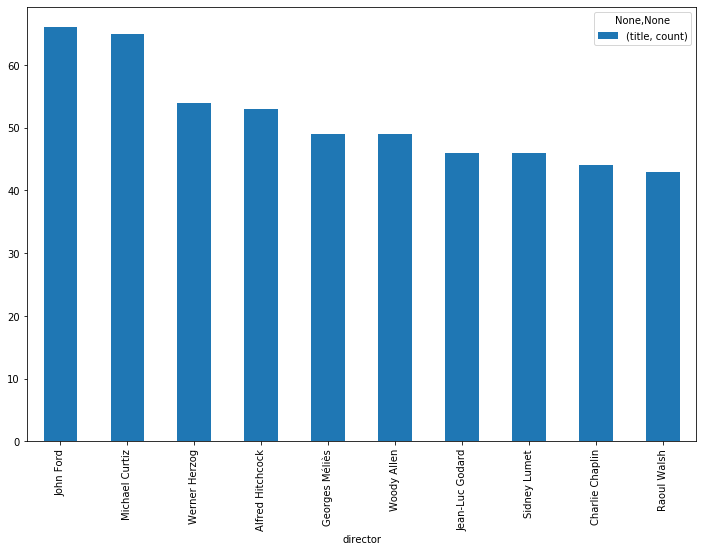

In [165]:
director.nlargest(10, ('title','count')).plot(kind = 'bar', y = ('title','count'), figsize = (12,8))
plt.show()

##### Total Revenue

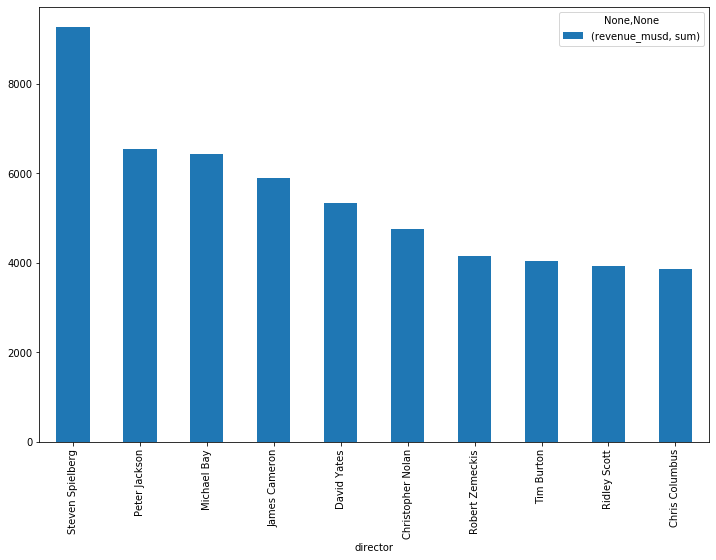

In [166]:
director.nlargest(10, ('revenue_musd','sum')).plot(kind = 'bar', y = ('revenue_musd','sum'), figsize = (12,8))
plt.show()

# EXPLORATORY DATA ANALYSIS
# Part 9 : Release Date by Year

In [167]:
df_eda['release_date'] = pd.to_datetime(df_eda['release_date'])

In [168]:
movie_release_year = df_eda.groupby(df_eda['release_date'].dt.year)['title'].count()

In [169]:
type(movie_release_year)

pandas.core.series.Series

In [170]:
movie_release_year = pd.DataFrame(movie_release_year)
movie_release_year

,title
release_date,
1874.0,1
1878.0,1
1883.0,1
1887.0,1
1888.0,2
...,...
2013.0,1870
2014.0,1949
2015.0,1867


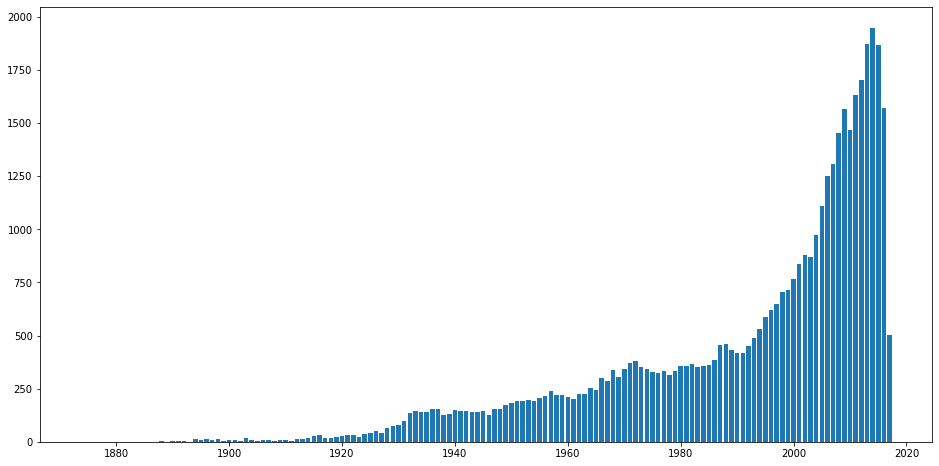

In [171]:
plt.figure(figsize=(16,8))
plt.bar(x = movie_release_year.index, height = movie_release_year.title)
plt.show()